In [1]:
import sys
import os

# Allows importing modules defined inside the project directory:
path = os.path.abspath(os.path.curdir)
while len(path) > 1 and not path.endswith('PhD'):
    path = os.path.abspath(os.path.join(path, '..'))
if path not in sys.path:
    sys.path.append(path)

# Import example:
# import search_algorithms.morbc as morbc

# IMPORTANT! Modifications made to such modules after import do
# not take effect until the Python kernel is restarted.

In [2]:
import numpy as np

In [3]:
def joint_payoff(player1_payoff, player2_payoff):
    return np.array([player1_payoff, player2_payoff]).swapaxes(0, 2).swapaxes(0, 1)
def symmetric_payoff(payoff):
    return joint_payoff(payoff, payoff.transpose())
symmetric_payoff(np.array([
    [ 0, 0, 0 ],
    [ 1, 1, 2 ],
    [ 2, 2, 2 ],
]))

array([[[0, 0],
        [0, 1],
        [0, 2]],

       [[1, 0],
        [1, 1],
        [2, 2]],

       [[2, 0],
        [2, 2],
        [2, 2]]])

# Symmetric problems

Swapping Player 0 with Player 1 yields essentially the same game.

## Example 1: semaphore

In [4]:
import auxiliary_algorithms.game_theory as gt

def bruteforce_NE(payoff):
    return gt.nash_equilibria(payoff, [ [0], [1] ], [ [0], [1] ])

def list_nes(nes, payoff, values_table=None):
    return [ {
        'point': ne if values_table is None else tuple(values_table[i][n] for i, n in enumerate(ne)),
        'value': payoff[ne],
    } for ne in nes ]

def print_nes(nes, payoff=None, values_table=None, nes_is_object_list=False):
    if not nes_is_object_list and payoff is None:
        raise Exception('Payoff matrix is required when specifying only equilibria indices.')
    if len(nes) == 0:
        print('No Nash Equilibrium found.')
    for o in nes if nes_is_object_list else list_nes(nes, payoff, values_table):
        print(f"Nash Equilibrium {o['point']} with outcomes {o['value']}")

payoff_1 = np.array([   # Semaphore:
    [ 3, 3 ],           # If I stop, I waste a little time, so I'm not totally happy. But then
    [ 5, 0 ],           # if I go and you stop, I'm happy; if we both go, I'm in hospital! So
])                      # there are 2 NE; social conventions are used to eliminate ambiguity.
payoff_1 = symmetric_payoff(payoff_1)
nes_1 = bruteforce_NE(payoff_1)
print_nes(nes_1, payoff_1, [ ['stop', 'go'], ['stop', 'go']])

Nash Equilibrium ('stop', 'go') with outcomes [3 5]
Nash Equilibrium ('go', 'stop') with outcomes [5 3]


## Example 2: handcrafted 5x5 symmetric game

In [5]:
payoff_2 = np.array([   # Without pruning, the solution would include (1, 1) (with an outcome of
    [ 0, 0, 0, 0, 0 ],  # [1, 1]). However, any other solution dominates this one.
    [ 0, 1, 2, 1, 0 ],
    [ 0, 2, 2, 2, 0 ],
    [ 0, 3, 2, 1, 0 ],
    [ 1, 2, 1, 1, 1 ],
])
payoff_2 = symmetric_payoff(payoff_2)
nes_2 = bruteforce_NE(payoff_2)
print_nes(nes_2, payoff_2)

Nash Equilibrium (2, 2) with outcomes [2 2]
Nash Equilibrium (2, 3) with outcomes [2 2]
Nash Equilibrium (3, 2) with outcomes [2 2]


## Example 3: Prisoners' dilemma

In [6]:
payoff_3 = np.array([       # Prisoners' dilemma.
    [ [ 9,  9], [ 0, 10] ],
    [ [10,  0], [ 1,  1] ],
])
nes_3 = bruteforce_NE(payoff_3)
print_nes(nes_3, payoff_3)

Nash Equilibrium (1, 1) with outcomes [1 1]


In [7]:
def monte_carlo(payoff, p0, p1, n=100000):
    o0 = np.random.choice(elements, n, p=p0)
    o1 = np.random.choice(elements, n, p=p1)
    return np.array([payoff[tuple(o)] for o in np.array([o0, o1]).swapaxes(0, 1)])

elements = range(payoff_3.shape[0])
p0_0_3, p1_0_3 = 0.5, 0.5
p0_3 = np.array([p0_0_3, 1 - p0_0_3])
p1_3 = np.array([p1_0_3, 1 - p1_0_3])
outcomes = monte_carlo(payoff_3, p0_3, p1_3)
print(f'Test mixed strategy {p0_3} vs. {p1_3} yields {outcomes.mean(axis=0)}')
print_nes(nes_3, payoff_3)

Test mixed strategy [0.5 0.5] vs. [0.5 0.5] yields [4.99727 4.97257]
Nash Equilibrium (1, 1) with outcomes [1 1]


# Asymmetric problems

Swapping Player 0 with Player 1 yields a completely different game (i.e. the roles matter).

## Example 4: random asymmetric matrix

In [8]:
payoff_4 = np.random.random((1000, 1000, 2))   # Asymmetric 1000x1000 solved in 8s~16s.
nes_4 = bruteforce_NE(payoff_4)
print_nes(nes_4, payoff_4)

Nash Equilibrium (304, 5) with outcomes [0.99966548 0.99929006]


## Example 5: handcrafted problem with asymmetric number of strategies

Player 1 has 3 strategies, while Player 2 has 4 to pick from.

In [8]:
payoff_5 = np.array([
    [ [ 9,  5], [10,  6], [ 8,  1], [ 4,  0] ],
    [ [ 9, 10], [ 9,  7], [ 8,  2], [10,  0] ],
    [ [ 1,  3], [ 3,  8], [ 5,  1], [12,  0] ],
])
nes_5 = bruteforce_NE(payoff_5)
print_nes(nes_5, payoff_5)

Nash Equilibrium (0, 1) with outcomes [10  6]
Nash Equilibrium (1, 0) with outcomes [ 9 10]


## Example 6: handcrafted problem with 3-dimensional decision space and 3 objectives

Player 1 has 2 decision variables with different numbers of choices each (3 and 4), while Player 2 has only 1 decision variable with 10 choices to pick from.

Also, Player 1 wants to optimize the first 2 objectives, while Player 2 wants to optimize the 3rd objective.

In [5]:
payoff_6 = np.array([[  # shape == (3, 4, 10, 3); player 1 has 3*4=12 choices, player 2 has 10.
    [ [ 0,  0,  0], [ 1,  0,  1], [ 2,  0,  2], [ 1,  0,  2], [ 0,  0,  1], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 1,  0,  1] ],
    [ [ 0,  0,  1], [ 2,  0,  2], [10,  0,  4], [ 8,  0,  4], [ 4,  0,  2], [ 2,  0,  1], [ 1,  0,  0], [ 0,  1,  0], [ 1,  2,  1], [ 2,  1,  2] ],
    [ [ 0,  0,  2], [ 1,  0,  4], [ 2,  0, 10], [ 4,  0,  6], [ 2,  0,  4], [ 1,  0,  2], [ 0,  1,  1], [ 0,  2,  0], [ 0,  8,  0], [ 1,  2,  1] ],
    [ [ 0,  0,  1], [ 0,  0,  2], [ 1,  0,  6], [ 2,  0,  8], [ 1,  0,  2], [ 0,  0,  1], [ 0,  0,  0], [ 0,  1,  0], [ 0,  2,  0], [ 0,  1,  0] ],
], [
    [ [ 0,  0,  0], [ 0,  0,  0], [ 1,  0,  1], [ 0,  0,  2], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  1,  0], [ 0,  2,  1], [ 0,  0,  0] ],
    [ [ 0,  0,  0], [ 1,  0,  1], [ 2,  0,  2], [ 2,  0,  4], [ 2,  0,  2], [ 1,  0,  1], [ 0,  1,  0], [ 0,  2,  1], [ 0,  4,  2], [ 2,  1,  4] ],
    [ [ 0,  0,  1], [ 0,  0,  2], [ 3,  0,  8], [ 5,  0,  8], [ 1,  0,  4], [ 0,  1,  2], [ 0,  2,  1], [ 0,  4,  0], [ 1, 10,  1], [ 0,  2,  2] ],
    [ [ 0,  0,  0], [ 0,  0,  2], [ 0,  0,  2], [ 1,  0, 10], [ 0,  0,  2], [ 0,  0,  1], [ 0,  1,  0], [ 0,  2,  0], [ 0,  4,  0], [ 0,  8,  0] ],
], [
    [ [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  1], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  1,  0], [ 0,  0,  0] ],
    [ [ 0,  0,  0], [ 0,  0,  0], [ 1,  0,  1], [ 1,  0,  2], [ 1,  0,  1], [ 0,  0,  0], [ 0,  0,  0], [ 0,  1,  0], [ 0,  2,  1], [ 1,  0,  2] ],
    [ [ 0,  0,  0], [ 0,  0,  1], [ 1,  0,  2], [ 2,  0,  4], [ 0,  0,  2], [ 0,  0,  1], [ 0,  1,  0], [ 0,  2,  0], [ 0,  4,  0], [ 0,  1,  1] ],
    [ [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  1], [ 1,  0,  6], [ 0,  0,  1], [ 0,  0,  0], [ 0,  0,  0], [ 0,  1,  0], [ 0,  2,  0], [ 0,  4,  0] ],
]])
nes_6 = gt.nash_equilibria(payoff_6, [ [0, 1], [2] ], [ [0, 1], [2] ])
print_nes(nes_6, payoff_6)

Nash Equilibrium (0, 1, 2) with outcomes [10  0  4]
Nash Equilibrium (0, 1, 3) with outcomes [8 0 4]
Nash Equilibrium (1, 1, 9) with outcomes [2 1 4]


## Example 7: discretized FlipIt $\left\{ φ×α_D | α_A \right\} → \left\{ β_D×K | β_A \right\}$

Generating data:

In [6]:
import concurrent.futures
import numpy as np

def generate_moves(δ_0, δ_1, t_max):

    # Random initial phases:
    phase_0 = np.random.uniform(0, δ_0)
    phase_1 = np.random.uniform(0, δ_1)

    # Deterministic periodic moves:
    moves_0 = np.arange(phase_0, t_max, δ_0)
    moves_1 = np.arange(phase_1, t_max, δ_1)

    # Concatenates moves together in a single "timeline":
    moves  = np.concatenate([moves_0, moves_1])
    movers = np.concatenate([
        np.zeros(moves_0.shape[0], dtype=int),
        np.ones( moves_1.shape[0], dtype=int),
    ])

    # Sorts "timeline" by move time while sliding the "mover" label along:
    s = sorted(zip(moves, movers), key=lambda pair: pair[0])
    moves  = np.array([move  for move, mover in s])
    movers = np.array([mover for move, mover in s], dtype=int)

    return moves, movers

def p(φ):
    return 1/2 - 1/2*np.tanh(phi_zero*(φ - 1/2))

# Computes the ratio of resource control time by player:
def total_control_ratio(moves, movers, t_max, φ):
    t = 0
    s = [0, 0]
    last_mover = 0
    # p = 1 / np.e**φ
    P = p(φ)
    for move, mover in zip(moves, movers):
        s[last_mover] += (move - t)/t_max
        t = move
        # Only allows attacker to dominate resource if he passes the challenge:
        last_mover = mover if mover == 0 else int(np.random.rand() < P)
    s[last_mover] += (t_max - t)/t_max
    return s

def analytical_benefit_defender(φ, α_D, α_A, k_D):
    return 1 - p(φ)*(1 - α_D/(2*α_A)) - k_D*α_D if α_D < α_A else 1 - p(φ)*α_A/(2*α_D) - k_D*α_D
def analytical_benefit_attacker(φ, α_D, α_A, k_A):
    return     p(φ)*(1 - α_D/(2*α_A)) - k_A*α_A if α_D < α_A else     p(φ)*α_A/(2*α_D) - k_A*α_A

# def run(φ, δ_D, δ_A):
#     moves, movers = generate_moves(δ_D, δ_A, t_max)
#     control_ratio_0, control_ratio_1 = total_control_ratio(moves, movers, t_max, φ)
#     move_rate_D = np.sum(movers == 0) / t_max
#     move_rate_A = np.sum(movers == 1) / t_max
#     return (control_ratio_0 - move_rate_D*k_D, control_ratio_1 - move_rate_A*k_A)
def simulate(φ, α_D, α_A, sims, k_D, k_A, c):
    δ_D = 1/α_D
    δ_A = 1/α_A
    r = δ_D/δ_A
    
    results = {
        'an_β_D': analytical_benefit_defender(φ, α_D, α_A, k_D),
        'an_β_A': analytical_benefit_attacker(φ, α_D, α_A, k_A),
        'K': c*φ,
    }
    si_β_D = []
    si_β_A = []
    for s in range(sims):
        moves, movers = generate_moves(δ_D, δ_A, t_max)
        control_ratio_0, control_ratio_1 = total_control_ratio(moves, movers, t_max, φ)
        move_rate_D = np.sum(movers == 0) / t_max
        move_rate_A = np.sum(movers == 1) / t_max
        si_β_D.append(control_ratio_0 - move_rate_D*k_D)
        si_β_A.append(control_ratio_1 - move_rate_A*k_A)
    results['si_β_D'] = np.average(si_β_D) if sims > 0 else 0.0
    results['si_β_A'] = np.average(si_β_A) if sims > 0 else 0.0
    
    # if sims > 0:
    #     with concurrent.futures.ThreadPoolExecutor() as executor:
    #         phis = [ φ for _ in range(sims) ]
    #         deltas_D = [ δ_D for _ in range(sims) ]
    #         deltas_A = [ δ_A for _ in range(sims) ]
    #         concurrent_results = executor.map(run, phis, deltas_D, deltas_A)
    #         results['si_β_D'] = np.average([ d for d, a in concurrent_results ])
    #         results['si_β_A'] = np.average([ a for d, a in concurrent_results ])
    # else:
    #     results['si_β_D'] = 0.0
    #     results['si_β_A'] = 0.0
    #     # print(f'Finished batch of {sims} simulations for {φ}, {δ_D}, {δ_A}')
    
    results['sims'] = sims
    return results

def increment(results, φ, α_D, α_A, sims, k_D, k_A, c):
    if φ not in results:
        results[φ] = {}
    if α_D not in results[φ]:
        results[φ][α_D] = {}
    if α_A not in results[φ][α_D]:
        results[φ][α_D][α_A] = {
            'an_β_D': 0,
            'an_β_A': 0,
            'K': 0,
            'si_β_D': 0,
            'si_β_A': 0,
            'sims': 0,
        }
    new_results = simulate(φ, α_D, α_A, sims, k_D, k_A, c)
    results[φ][α_D][α_A]['an_β_D'] = new_results['an_β_D']
    results[φ][α_D][α_A]['an_β_A'] = new_results['an_β_A']
    results[φ][α_D][α_A]['K']      = new_results['K']
    weights = results[φ][α_D][α_A]['sims'] + new_results['sims']
    def mix_results(key):
        weighted_current = results[φ][α_D][α_A][key] * results[φ][α_D][α_A]['sims']
        weighted_new = new_results[key] * new_results['sims']
        results[φ][α_D][α_A][key] = (weighted_current + weighted_new) / weights
    mix_results('si_β_D')
    mix_results('si_β_A')
    results[φ][α_D][α_A]['sims'] = weights

t_max = 200
sims = 10
phi_zero = 5
investments_7 = np.linspace(0, 1.5, 50)
rates_D_7 = np.linspace(0.01, 1.00, 200)
rates_A_7 = np.linspace(0.01, 1.00, 200)
results_7 = {}
k_D = 1.0
k_A = 1.5
c = 0.2 # 2.0

# for φ in investments_7:
#     for α_D in rates_D_7:
#         for α_A in rates_A_7:
#             increment(results_7, φ, α_D, α_A, sims, k_D, k_A, c)

Saving/loading data to/from disk:

In [12]:
import pickle

# with open('example-7_01.pickle', 'wb') as file:
#     pickle.dump({
#         'phi_zero': 5,
#         'p': '1/2 - 1/2*np.tanh(phi_zero*(φ - 1/2))',
#         'description': '{ φ(50) × α_D(200) | α_A(200) } → { β_D × K | β_A }',
#         't_max': t_max,
#         'sims': sims,
#         'rates_D_7': rates_D_7,
#         'rates_A_7': rates_A_7,
#         'investments_7': investments_7,
#         'results_7': results_7,
#         'k_D': k_D,
#         'k_A': k_A,
#         'c': c,
#     }, file)

with open('example-7_01.pickle', 'rb') as file:
    data = pickle.load(file)
    print(f"{data['description']} loaded.")
    phi_zero = data['phi_zero']
    t_max = data['t_max']
    sims = data['sims']
    rates_D_7 = data['rates_D_7']
    rates_A_7 = data['rates_A_7']
    investments_7 = data['investments_7']
    results_7 = data['results_7']
    k_D = data['k_D']
    k_A = data['k_A']
    c = data['c']

{ φ(50) × α_D(200) | α_A(200) } → { β_D × K | β_A } loaded.


Compiling the actual payoff matrix:

In [13]:
import auxiliary_algorithms.util as u

def get_results(indices):
    results = results_7[investments_7[indices[0]]][rates_D_7[indices[1]]][rates_A_7[indices[2]]]
    return [-results['K'], results['si_β_D'], results['si_β_A']]

payoff_7 = np.array(u.create_multidimensional_list(
    (len(investments_7), len(rates_D_7), len(rates_A_7)),
    get_results,
))
payoff_7.shape

(50, 200, 200, 3)

Solving with brute force algorithm:

In [16]:
nes_7 = gt.nash_equilibria(payoff_7, [ [0, 1], [2] ], [ [0, 1], [2] ])  # ~1 minute.
print_nes(nes_7, payoff_7)

No Nash Equilibrium found.


Listing all analytical Nash Equilibria for the values of $\phi$:

In [7]:
def root_a(φ, α_A):
    """
    Returns the value of α_D such that the benefit of the defender is maximized under certain
    constraints.
    
    Equation: `np.sqrt(p(φ)*α_A/(2*k_D))`
    """
    return np.sqrt(p(φ)*α_A/(2*k_D))
def root_c(φ):
    """
    Returns the value of α_D such that the benefit of the attacker is independent of his α_A
    under certain constraints, for all α_A ∈ [0, α_D].
    
    Equation: `p(φ)/(2*k_A)`
    """
    return p(φ)/(2*k_A)
def cross_α_A(φ):
    return p(φ)*k_D/(2*k_A**2)

def analytical_ne_error(φ, α_D, α_A, tolerance=0.0000001):
    β_D = analytical_benefit_defender(φ, α_D, α_A, k_D)
    # if analytical_benefit_defender(φ - 0.01, α_D, α_A, k_D) - β_D > tolerance:
    #     return f'{(φ, α_D, α_A)} Defender could reduce φ to obtain higher benefit: {β_D} → {analytical_benefit_defender(φ - 0.01, α_D, α_A, k_D)}'
    # if analytical_benefit_defender(φ + 0.01, α_D, α_A, k_D) - β_D > tolerance:
    #     return f'{(φ, α_D, α_A)} Defender could increment φ to obtain higher benefit: {β_D} → {analytical_benefit_defender(φ + 0.01, α_D, α_A, k_D)}'
    if analytical_benefit_defender(φ, α_D - 0.01, α_A, k_D) - β_D > tolerance:
        return f'{(φ, α_D, α_A)} Defender could reduce α_D to obtain higher benefit: {β_D} → {analytical_benefit_defender(φ, α_D - 0.01, α_A, k_D)}'
    if analytical_benefit_defender(φ, α_D + 0.01, α_A, k_D) - β_D > tolerance:
        return f'{(φ, α_D, α_A)} Defender could increment α_D to obtain higher benefit: {β_D} → {analytical_benefit_defender(φ, α_D + 0.01, α_A, k_D)}'
    β_A = analytical_benefit_attacker(φ, α_D, α_A, k_A)
    if analytical_benefit_attacker(φ, α_D, α_A - 0.01, k_A) - β_A > tolerance:
        return f'{(φ, α_D, α_A)} Attacker could reduce α_A to obtain higher benefit: {β_A} → {analytical_benefit_attacker(φ, α_D, α_A - 0.01, k_A)}'
    if analytical_benefit_attacker(φ, α_D, α_A + 0.01, k_A) - β_A > tolerance:
        return f'{(φ, α_D, α_A)} Attacker could increment α_A to obtain higher benefit: {β_A} → {analytical_benefit_attacker(φ, α_D, α_A + 0.01, k_A)}'
    return None

def list_analytical_ne(investments):
    points = [ (φ, root_c(φ), cross_α_A(φ)) for φ in investments ]
    return [{
        'point': ne,
        'value': (-c*ne[0], analytical_benefit_defender(*ne, k_D), analytical_benefit_attacker(*ne, k_A)),
    } for ne in points]

analytical_ne = list_analytical_ne(investments_7)
valid_ne = [ ne for ne in analytical_ne if analytical_ne_error(*ne['point']) is None ]
ne_errors = [ analytical_ne_error(*ne['point']) for ne in analytical_ne if ne not in valid_ne ]
print('\n'.join(ne_errors))
print_nes(analytical_ne, nes_is_object_list=True)


Nash Equilibrium (0.0, 0.33110238302523837, 0.2207349220168256) with outcomes (-0.0, 0.3377952339495232, 0.0)
Nash Equilibrium (0.030612244897959183, 0.3303106168528816, 0.22020707790192107) with outcomes (-0.006122448979591837, 0.33937876629423686, -5.551115123125783e-17)
Nash Equilibrium (0.061224489795918366, 0.32924132497617725, 0.21949421665078483) with outcomes (-0.012244897959183675, 0.34151735004764555, 0.0)
Nash Equilibrium (0.09183673469387754, 0.3278001055280586, 0.2185334036853724) with outcomes (-0.01836734693877551, 0.3443997889438828, 0.0)
Nash Equilibrium (0.12244897959183673, 0.3258628011939892, 0.21724186746265944) with outcomes (-0.02448979591836735, 0.34827439761202167, 0.0)
Nash Equilibrium (0.15306122448979592, 0.32326803154054934, 0.2155120210270329) with outcomes (-0.030612244897959186, 0.35346393691890127, 5.551115123125783e-17)
Nash Equilibrium (0.18367346938775508, 0.31980941385896927, 0.21320627590597951) with outcomes (-0.03673469387755102, 0.3603811722820

# "Simple" CoEA

In [15]:
import auxiliary_algorithms.pareto_dominance as pado

def count_pareto_dominance(outcomes):
    n = len(outcomes)
    count = np.zeros(shape=(n,))
    for i in range(n):
        for j in range(i):
            if pado.pareto_dominates(pado.solution_values(outcomes[i]), pado.solution_values(outcomes[j])):
                count[i] += 1
                count[j] -= 1
            elif pado.pareto_dominates(pado.solution_values(outcomes[j]), pado.solution_values(outcomes[i])):
                count[i] -= 1
                count[j] += 1
    return count

def sort_by_pareto_dominance(entities, outcomes):
    n = entities.shape[0]
    count = count_pareto_dominance(outcomes)
    unranked = [ { 'entity': entities[i], 'outcome': outcomes[i], 'rank': count[i] } for i in range(n) ]
    ranked = sorted(unranked, key=lambda u: u['rank'], reverse=True)
    return ([ r['entity'] for r in ranked ], [ r['outcome'] for r in ranked ], [ r['rank'] for r in ranked ])

sort_by_pareto_dominance(np.array([0, 1, 2, 3]), np.array([[0, 1], [0, 4], [0, 2], [0, 3]]))

([1, 3, 2, 0],
 [array([0, 4]), array([0, 3]), array([0, 2]), array([0, 1])],
 [3.0, 1.0, -1.0, -3.0])

In [9]:
# Based on: https://deap.readthedocs.io/en/master/examples/coev_coop.html

import auxiliary_algorithms.pareto_dominance as pado

def aggregate(species, representatives, species_index):
    rl = np.array([ representatives[i] for i in range(species.shape[0]) if i < species_index ]).repeat(species.shape[1])
    rr = np.array([ representatives[i] for i in range(species.shape[0]) if i > species_index ]).repeat(species.shape[1])
    # print(rl, species[species_index], rr)
    solutions = np.array([ arr for arr in [rl, species[species_index], rr] if arr.size != 0]).transpose()
    return solutions

def coea(
    n_choices,
    evaluate_fn,
    variate_fn,
    select_fn,
    n_species = 2,
    n_entities = 10,
    n_replacements = 3,
    n_generations = 100,
):
    # print(f'{n_choices} possible strategies per entity; {n_species} species of {n_entities} entities (1 being the representative)')
    # print(f'Example evaluation: {evaluate_fn(np.array([1, 0]))}')

    # Initialize species (initialize pop + select evaluators + evaluate individuals):
    species = np.random.choice(range(n_choices), size=(n_species, n_entities))
    # print('Initial entities:', species)
    representatives_indices = np.random.choice(range(n_entities), size=(n_species))
    representatives = [ species[i][representatives_indices[i]] for i in range(n_species) ]
    ranks = [ [] for _ in range(n_species) ]
    # print('Initial representatives:', representatives_indices, '→', representatives)

    # Outer loop ("while not done" in Popovici; "for j ← 1 to Cycles" in Antonio):
    for _ in range(n_generations):
        # print(f'Generation {_}:')
        
        solutions = [ aggregate(species, representatives, i) for i in range(n_species) ]
        # print('Solutions:', solutions)
        outcomes = np.array([ [ evaluate_fn(solution, i) for solution in solutions[i] ] for i in range(n_species) ])
        # print('Outcomes:', outcomes)

        # Initialize a container for the next generation representatives:
        next_repr = [None] * n_species
        # for (i, s), j in zip(enumerate(species), species_index):
        for i in range(n_species):
            s = species[i]
            # print('Pre :', s)

            print(list(zip(solutions[i], outcomes[i])))
            solutions[i], outcomes[i], ranks[i] = sort_by_pareto_dominance(solutions[i], outcomes[i])
            print(list(zip(solutions[i], outcomes[i], ranks[i])))
            children = [ sel[i] for sel in select_fn(solutions[i], outcomes[i], n_replacements) ]
            next_repr[i] = children[0]
            children = variate_fn(np.array(children))
            discarded_elements = np.random.choice(range(n_entities), size=(n_replacements,), replace=False)
            s[discarded_elements] = children

            # print('Post:', s)
            continue

            # Vary the species individuals:
            # s = algorithms.varAnd(s, toolbox, 0.6, 1.0)
            s = variate_fn(s)
            # print('Post:', s)

            # # Get the representatives excluding the current species
            # r = representatives[:i] + representatives[i+1:]
            # r = representatives[np.arange(n_species) != i]
            rl = species[:,:i][representatives[:i]].repeat(n_entities)
            rr = species[:,i+1:][representatives[i+1:]].repeat(n_entities)
            solutions = np.array([ arr for arr in [rl, s, rr] if arr.size != 0]).transpose()
            # print('solutions', solutions)
            outcomes[:,i] = np.array([ evaluate_fn(solution, i) for solution in solutions ])
            # print('outcomes[:,i]', outcomes[:,i])
            print('solutions || outcomes[:,i]', np.concatenate([solutions, outcomes[:,i]], axis=1))

            # # Select the individuals
            # species[i] = toolbox.select(s, len(s))  # Tournament selection
            species[i] = select_fn(solutions, outcomes[:,i])
            # next_repr[i] = toolbox.get_best(s)[0]   # Best selection
            next_repr[i] = np.where(outcomes[:,i] == outcomes[:,i].max())[0][0]
            print('next', next_repr[i])
        # print('Current representatives:', representatives)
        representatives = np.array(next_repr)
    return species

def tournament_selection(solutions, outcomes, n):
    # print('hooo', solutions, outcomes)
    selected = []
    for _ in range(n):
        parents = np.random.choice(range(solutions.shape[0]), size=(2,), replace=False)
        if pado.pareto_dominates(outcomes[parents[0]], outcomes[parents[1]]):
            selected.append(solutions[parents[0]])
        elif pado.pareto_dominates(outcomes[parents[1]], outcomes[parents[0]]):
            selected.append(solutions[parents[1]])
        else:
            selected.append(solutions[parents[np.random.choice([0, 1])]])
    return selected

def domination_selection(solutions, outcomes, n):
    return solutions[:n]

# print(payoff_1)
results = coea(
    payoff_1.shape[0],
    lambda solution, species_index: [payoff_1[tuple(solution)][species_index]],
    lambda entities: 1 - entities,
    tournament_selection,
    n_entities=5,
    n_replacements=2,
    n_generations=10,
)
print(results)
print(results.mean(axis=1))

[(array([0, 1]), array([3])), (array([0, 1]), array([3])), (array([1, 1]), array([0])), (array([0, 1]), array([3])), (array([1, 1]), array([0]))]
[(array([0, 1]), array([3]), 2.0), (array([0, 1]), array([3]), 2.0), (array([0, 1]), array([3]), 2.0), (array([1, 1]), array([3]), -3.0), (array([1, 1]), array([0]), -3.0)]


AttributeError: 'list' object has no attribute 'shape'

In [10]:
import numpy as np

def cartesian_product(x, y, *other_arrays):
    if x.ndim < 2:
        x = np.atleast_2d(x).T
    if y.ndim < 2:
        y = np.atleast_2d(y).T

    sx, sy = x.shape, y.shape
    sz = sy[:-1] + sx[:-1] + (sy[-1] + sx[-1],)
    z = np.empty(sz, np.result_type(x, y))

    # Broadcasted assignment
    z[...,:sx[-1]] = x
    z[...,sx[-1]:] = y.reshape(sy[:-1] + (x.ndim-1)*(1,) + (sy[-1],))

    answer = z.reshape((x.shape[0]*y.shape[0], x.shape[1]+y.shape[1]))
    if len(other_arrays) > 0:
        return cartesian_product(answer, *other_arrays)

    return answer

array1 = np.array([[1,2], [3,4], [5,6]])
array2 = np.array([['a'], ['b']])
array3 = np.array([[8], [9]])
arrays = [ array1, array2, array3 ]

cartesian_product(*arrays)

array([['1', '2', 'a', '8'],
       ['3', '4', 'a', '8'],
       ['5', '6', 'a', '8'],
       ['1', '2', 'b', '8'],
       ['3', '4', 'b', '8'],
       ['5', '6', 'b', '8'],
       ['1', '2', 'a', '9'],
       ['3', '4', 'a', '9'],
       ['5', '6', 'a', '9'],
       ['1', '2', 'b', '9'],
       ['3', '4', 'b', '9'],
       ['5', '6', 'b', '9']], dtype='<U21')

# EGT algorithm

Pseudo codes:

```
function EvolutionaryGameAlgorithm():
    Initialize population P with random strategies for each player
    Evaluate the strategies in P based on their performance in the game

    Repeat until convergence:
        Select parents from P based on some selection mechanism
        Apply genetic operators (crossover, mutation) to create offspring
        Evaluate the new offspring strategies
        Combine the current population P and the offspring
        Select individuals for the next generation using a selection mechanism
        Update the strategies based on evolutionary dynamics
        Apply some form of replicator dynamics or other update rules
        Identify Pareto-Nash Equilibria in the population
    Return the Pareto-Nash Equilibria found
```

---

```
function EvolutionaryGameAlgorithm(population_size, generations):
    Initialize population P with random strategies for each player
    Repeat for a specified number of generations:
        Evaluate the fitness of each strategy in the population based on multiple objectives
        Select strategies for reproduction (e.g., using tournament selection)
        Apply genetic operators (crossover, mutation) to create offspring strategies
        Combine the current population and the offspring
        Evaluate the fitness of each strategy in the combined population
        Select the next generation based on strategies' fitness (e.g., Pareto dominance)
    Return the Pareto Front, representing non-dominated strategies

function TournamentSelection(population, tournament_size):
    Randomly select a subset of strategies from the population (tournament)
    Choose the strategy with the highest fitness from the tournament
    Return the selected strategy

function Crossover(parent1, parent2, crossover_rate):
    If a random number is less than the crossover_rate:
        Perform crossover to create an offspring by exchanging genetic information between parents
    Else:
        Return the parents as they are

function Mutation(strategy, mutation_rate):
    For each decision variable in the strategy:
        If a random number is less than the mutation_rate:
            Perturb the decision variable (introduce small random changes)
    Return the mutated strategy
```

---

```
Initialize S with random strategies for each p
Evaluate each s in S
Repeat until done:
    For each p:
        Select parents based on {Pareto Domination Rank?}
        Crossover parents to generate offspring
        Mutate offspring
        Evaluate offspring
        Insert offspring into S
        Select survivals from S based on {Pareto Domination Rank?}
        {Evolutionary/replicator dynamics?}
{Pareto-Nash Equilibria?}
```

In [47]:
from scipy.interpolate import interpn

def blend_crossover(parent_a, parent_b, α):
    return (1-α)*np.array(parent_a) + α*np.array(parent_b)

def payoff_matrix(S, evaluate_fn, players_n_decisions, n_entities, n_players):
    return np.array(u.create_multidimensional_list(
        [ n_entities for p in range(n_players) for _ in range(players_n_decisions[p]) ],
        lambda indices: evaluate_fn(tuple(S[e][i] for i, e in enumerate(indices))),
    ))

def payoff_rounding_evaluator(payoff, solution):
    negative = [ n if n < 0 else payoff.shape[d] - n - 1 for d, n in enumerate(solution) if n < 0 or n > payoff.shape[d] - 1 ]
    if len(negative) > 0:
        return sum(negative)*1000000000*np.ones((3,))
    # for d, n in enumerate(solution):
    #     if n < 0 or n > payoff.shape[d] - 1:
    #         return -np.ones(payoff.shape[-1])
    indices = [ round(c) for i, c in enumerate(solution) ]
    return payoff[tuple(indices)]

def payoff_interpolation_evaluator(payoff, points, solution):
    negative = [ n if n < 0 else payoff.shape[d] - n - 1 for d, n in enumerate(solution) if n < 0 or n > payoff.shape[d] - 1 ]
    if len(negative) > 0:
        return sum(negative)*1000000000*np.ones((3,))
    # for d, n in enumerate(solution):
    #     if n < 0 or n > payoff.shape[d] - 1:
    #         return -np.ones(payoff.shape[-1])
    return interpn(points, payoff, solution)[0]

def crossover_fn(parent_a, parent_b, max_abs_dist):
    diff = np.array(parent_b) - np.array(parent_a)
    diff_norm = np.linalg.norm(diff)
    if diff_norm == 0:
        # When parent_a and parent_b are equal vectors/scalars, we
        # pick a random "direction" and walk a random distance that
        # is less than `max_abs_dist`:
        try:
            diff = np.random.randn(len(parent_a))
        except TypeError:
            diff = np.random.rand() - 0.5
        unit_vector = diff / np.linalg.norm(diff)
        return parent_a + np.random.rand()*max_abs_dist*unit_vector

    # Calls blend_crossover with a random α, but making sure that a
    # maximum absolute distance of drift from the extremities is
    # respected; that is to say, even though there's no bound on the
    # drift BETWEEN the parents (i.e. case 0 <= α <= 1), when α < 0
    # or α > 1, we guarantee that the drift from parent a or b
    # (respectively) won't be greater than `max_abs_dist`:
    max_rel_dist = max_abs_dist/diff_norm
    α = (1 + 2*max_rel_dist) * np.random.rand() - max_rel_dist
    return blend_crossover(parent_a, parent_b, α)

## RENASCE

Resolution-Enhancement Nash equilibria Approximation by Strategy CoEvolution

In [14]:
import numpy as np

import auxiliary_algorithms.util as u
import auxiliary_algorithms.game_theory as gt
from auxiliary_algorithms.roulette_wheel import RouletteWheel

def pareto_fitness(S, O, n_players, players_decisions, players_objectives):
    fitness = np.zeros(S.shape)
    for p in range(n_players):
        for d in players_decisions[p]:
            # print(f'Assessing decision {d} by player {p}...')
            decision_outcomes = []
            for s in range(O.shape[d]):
                decision_outcomes.append([])
                # other_dsi = np.ndindex(*[ O.shape[i] if i != d else 1 for i in players_decisions[p] ])
                other_dsi = np.ndindex(*[ l if i != d else 1 for i, l in enumerate(O.shape[:-1]) ])
                for other_dsi in other_dsi:
                    other_dsi = list(other_dsi)
                    other_dsi[d] = s
                    decision_value_outcomes = [ o for i, o in enumerate(O[tuple(other_dsi)]) if i in players_objectives[p] ]
                    decision_outcomes[s].append(decision_value_outcomes)
                    # print(f'  {other_dsi} -> {decision_value_outcomes}')
            # print(count_pareto_dominance(decision_outcomes))
            fitness[:, d] = np.array(count_pareto_dominance(decision_outcomes))
            ma = fitness[:, d].max()
            mi = fitness[:, d].min()
            fitness[:, d] = (fitness[:, d] - mi) / (ma - mi) if ma != mi else np.ones(fitness[:, d] .shape)
            # fitness[:, d] = fitness[:, d] - mi
            # print(f'ma={ma}, mi={mi}, current_max={fitness[:, d].max()}, current_min={fitness[:, d].min()}')
    return fitness

def br_fitness(S, O, best_responses, n_players, players_decisions, players_objectives):
    fitness = np.zeros(S.shape)
    for p in range(n_players):
        opponent_dsi = np.ndindex(*gt.opponent_decision_shape(O, players_decisions[p]))
        for opponent_dsi in opponent_dsi:
            for player_dsi in u.read_multidimensional_list(best_responses[p], opponent_dsi):
                # print(p, player_dsi)
                for d, e in enumerate(player_dsi):
                    c = players_decisions[p][d]
                    fitness[e, c] += 1
                    # print(f'  {e,c} = {S[e, c]}')
    return fitness

def dist_to_floor(vector):
    vector_floor = np.floor(vector)
    vector_ceil = np.ceil(vector)
    dist_max = np.linalg.norm(vector_ceil - vector_floor)
    if dist_max == 0:
        return 0
    return np.linalg.norm(vector - vector_floor) / dist_max

def RENASCE(
    evaluate_fn,
    crossover_fn,
    mutate_fn,
    initial_population=None,
    players_n_decisions=[ 1, 1 ],
    players_n_objectives=[ 1, 1 ],
    n_entities=50,
    n_children=10,
    n_generations=100,
    p_mutation=0.1,
):
    n_players = len(players_n_decisions)
    if len(players_n_objectives) != n_players:
        raise Exception('Amount of objective arrays must be equal to the number of players')
    n_decisions = np.sum([ i for i in players_n_decisions ])
    n_objectives = np.sum([ i for i in players_n_objectives ])
    
    archive = []

    d = 0
    o = 0
    players_decisions = []
    players_objectives = []
    for p in range(n_players):
        players_decisions.append([])
        for _ in range(players_n_decisions[p]):
            players_decisions[p].append(d)
            d += 1
        players_objectives.append([])
        for _ in range(players_n_objectives[p]):
            players_objectives[p].append(o)
            o += 1
    # print(f'{n_players} players; {n_decisions} decision variables {players_decisions}; {n_objectives} objectives {players_objectives}')

    # Species:
    # TBD: allow variable number of entities per player/variable!
    if initial_population is None:
        # S = np.random.rand(n_entities, sum(players_n_decisions[p] for p in range(n_players)))
        S = np.random.rand(n_entities, n_decisions)
    else:
        S = initial_population
    # print(S, S.shape, 'S')

    for g in range(n_generations):
        # verbose = g % 10 == 0 or g == n_generations - 1
        verbose = True
        # if verbose: print(f'generation {g+1:6d}')
        print(f'generation {g+1:6d}')
        
        # Payoff matrix:
        O = payoff_matrix(S, evaluate_fn, players_n_decisions, n_entities, n_players)
        # if verbose: print(O, O.shape, 'O')

        # For each player controlling at least 1 decision variable, there will always be at least
        # one BR per opponent joint strategy (or simply at least one if the opponent does not
        # control any decision variable), meaning that we will always be able to rank the player's
        # entities according to their fitness with respect to the Best Response:
        best_responses = [
            gt.best_response(O, players_decisions[p], players_objectives[p]) for p in range(n_players)
        ]
        # if verbose: print(best_responses)

        U = pareto_fitness(S, O, n_players, players_decisions, players_objectives)
        # if verbose: print(U, 'U')
        # print(U, f'U @ {g+1}')

        children = []
        for d in range(n_decisions):
            rw = RouletteWheel(U[:, d], 0.01)
            children.append([ crossover_fn(S[rw.rand(), d], S[rw.rand(), d]) for c in range(n_children) ])
            for c in range(n_children):
                if np.random.rand() < p_mutation:
                    children[-1][c] = mutate_fn(children[-1][c])
        C = np.array(children).T
        # if verbose: print(C, C.shape, 'C')
        S_ = np.concatenate([S, C], axis=0)
        # if verbose: print(S_, S_.shape, 'S_')

        # TBD: optimize performance:
        O_ = payoff_matrix(S_, evaluate_fn, players_n_decisions, n_entities + n_children, n_players)
        # if verbose: print(O_, O_.shape, 'O_')
        
        best_responses_ = [
            gt.best_response(O_, players_decisions[p], players_objectives[p]) for p in range(n_players)
        ]
        # if verbose: print(best_responses_)
        NE_ = gt.nash_equilibria(O_, players_decisions, players_objectives, best_responses=best_responses_)
        
        U_ = pareto_fitness(S_, O_, n_players, players_decisions, players_objectives)
        # if verbose: print(U_, 'U_')
        print(U_, 'U_')

        # new_populations = [ set() for _ in range(n_decisions) ]
        new_populations = [ [] for _ in range(n_decisions) ]
        # for ne in NE_:
        #     for d, e in enumerate(ne):
        #         if len(new_populations[d]) < n_entities:
        #             new_populations[d].add(S_[e, d])
        for d in range(n_decisions):
            # for i, u in enumerate(U[:, d]):
            #     if u > 0:
            #         new_populations[d].add(S[i, d])
            # e = n_entities + n_children
            # while e > 0 and len(new_populations[d]) < n_entities:
            #     e -= 1
            #     new_populations[d].add(S_[e, d])
            # e = 0
            # while e < n_entities + n_children and len(new_populations[d]) < n_entities:
            #     new_populations[d].add(S_[e, d])
            #     e += 1
            rw = RouletteWheel(U_[:, d], 0.01)
            while len(new_populations[d]) < n_entities:
                new_populations[d].append(S_[rw.rand(), d])
        S = np.array([p for p in new_populations]).T
        # if verbose: print(S, S.shape, 'new S')
        for o in list_nes(NE_, O_, S_.T):
            pado.non_pareto_dominated_insert(archive, o)
        if verbose:
            print('NE in population:')
            print_nes(NE_, O_, S_.T)
            print('NE in archive:')
            print_nes(archive, nes_is_object_list=True)
    return archive

Solving original matrix from Example 6

In [69]:
# Expected solution (analytical & brute force):
# Nash Equilibrium (0, 1, 2) with outcomes [10  0  4]
# Nash Equilibrium (0, 1, 3) with outcomes [8 0 4]
# Nash Equilibrium (1, 1, 9) with outcomes [2 1 4]
RENASCE(
    evaluate_fn=lambda solution: payoff_rounding_evaluator(payoff_6, solution),
    crossover_fn=lambda parent_a, parent_b: np.round(crossover_fn(parent_a, parent_b, 3.0)),
    mutate_fn=lambda child: round(child + (np.random.rand()*2 - 1)*3.0),
    initial_population=np.random.randint(0, 3, (5, 3)),
    p_mutation=0.4,
    players_n_decisions=[ 2, 1 ],
    players_n_objectives=[ 2, 1 ],
    n_entities = 5,
    n_children = 3,
    n_generations=50,
)

generation      1
[[ 1.  0.  1.]
 [ 0.  1.  1.]
 [ 1.  2.  1.]
 [ 1.  2.  0.]
 [ 1.  0.  0.]
 [-0.  2.  2.]
 [-4.  1.  0.]
 [ 1.  2.  1.]] (8, 3) S_
[[1.         0.         0.58333333]
 [1.         1.         0.58333333]
 [1.         1.         0.58333333]
 [1.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         1.         1.        ]
 [0.         1.         0.        ]
 [1.         1.         0.58333333]] U_
NE in population:
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
Nash Equilibrium (-0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
Nash Equilibrium (-0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
NE in archive:
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
generation      2
[[1. 2. 2.]
 [1. 1. 1.]
 [1. 2. 1.]
 [1. 1. 1.]
 [1. 2. 1.]
 [2. 2. 4.]
 [3. 4. 0.]
 [2. 2. 1.]] (8, 3) S_
[[1.         1.         1.        ]
 [1.         1.         0.42857143]
 [1.         1.       

[{'point': (0.0, 1.0, 2.0), 'value': array([10.,  0.,  4.])},
 {'point': (1.0, 2.0, 3.0), 'value': array([5., 0., 8.])},
 {'point': (1.0, 1.0, 9.0), 'value': array([2., 1., 4.])}]

Solving interpolated matrix from Example 6

In [70]:
points_6 = tuple(np.arange(l) for l in payoff_6.shape[:-1])

# Expected solution (analytical & brute force):
# Nash Equilibrium (0, 1, 2) with outcomes [10  0  4]
#               ... and everything in between until ...
# Nash Equilibrium (0, 1, 3) with outcomes [8 0 4]
# Nash Equilibrium (1, 1, 9) with outcomes [2 1 4]
RENASCE(
    evaluate_fn=lambda solution: payoff_interpolation_evaluator(payoff_6, points_6, solution),
    crossover_fn=lambda parent_a, parent_b: crossover_fn(parent_a, parent_b, 2.0),
    mutate_fn=lambda child: child + (np.random.rand()*2 - 1)*2.0,
    p_mutation=0.4,
    players_n_decisions=[ 2, 1 ],
    players_n_objectives=[ 2, 1 ],
    n_entities = 10,
    n_children = 5,
    n_generations=200,
)

generation      1
[[ 0.82569059  0.93183685  0.77775306]
 [ 0.33108355  0.40405134  0.17719892]
 [ 0.6330137   0.82823638  0.01754569]
 [ 0.16145867  0.56457796  0.10287718]
 [ 0.17172865  0.30001379  0.98340471]
 [ 0.5531677   0.84895549  0.46966884]
 [ 0.84591173  0.48341386  0.34336641]
 [ 0.67680725  0.42169353  0.15038548]
 [ 0.65655233  0.80940956  0.15892367]
 [ 0.88234444  0.84687469  0.81821221]
 [ 1.73873908  0.07081115  1.37498173]
 [-0.47814754  0.57557579 -1.3482812 ]
 [ 3.14024716  1.38942047 -0.67970942]
 [-0.36212938 -1.11599295 -1.5811041 ]
 [-0.15666937  0.91403271  0.14180499]] (15, 3) S_
[[0.44       1.         0.76923077]
 [0.84       0.22222222 0.53846154]
 [0.68       0.7037037  0.15384615]
 [1.         0.44444444 0.23076923]
 [0.92       0.14814815 0.92307692]
 [0.76       0.85185185 0.69230769]
 [0.36       0.37037037 0.61538462]
 [0.52       0.2962963  0.38461538]
 [0.6        0.62962963 0.46153846]
 [0.28       0.77777778 0.84615385]
 [0.2        0.07407407 1

[{'point': (0.0104207175207085, 1.2743215467933149, 2.036509165176128),
  'value': array([7.71538438, 0.        , 5.58599648])},
 {'point': (0.0104207175207085, 1.3230886779293058, 2.036509165176128),
  'value': array([7.3369057 , 0.        , 5.87151458])},
 {'point': (0.0104207175207085, 1.0249742008088847, 2.036509165176128),
  'value': array([9.65055361, 0.        , 4.12613653])},
 {'point': (0.0005852938682123776, 1.0325064993868822, 2.0767130497808646),
  'value': array([9.59207236, 0.        , 4.18398644])},
 {'point': (0.05940457640503172, 1.405335471423832, 2.0003674720719795),
  'value': array([6.49867547, 0.        , 6.31266923])},
 {'point': (0.05940457640503172, 1.1390916682924104, 2.0003674720719795),
  'value': array([8.48590127, 0.        , 4.71558614])},
 {'point': (0.025911475977346665, 1.0971935223670926, 2.084598359950912),
  'value': array([8.90547682, 0.        , 4.50325878])},
 {'point': (0.00771826558455424, 1.1860591462451753, 2.0147662291951716),
  'value': arr

### Solving Example 7

In [78]:
k_D = 1.0
k_A = 1.5
c = 0.2 # 2.0

def evaluate_simulation(solution):
    negative = [ n for d, n in enumerate(solution) if n < 0 ]
    if len(negative) > 0:
        return sum(negative)*100*np.ones((3,))
    result = simulate(*solution, 10, k_D, k_A, c)
    return (-result['K'], result['si_β_D'], result['si_β_A'])

RENASCE(
    evaluate_fn=evaluate_simulation,
    crossover_fn=lambda parent_a, parent_b: crossover_fn(parent_a, parent_b, 0.5),
    mutate_fn=lambda child: child + (np.random.rand()*2 - 1)*0.5,
    p_mutation=0.4,
    players_n_decisions=[ 2, 1 ],
    players_n_objectives=[ 2, 1 ],
    n_entities = 10,
    n_children = 5,
    n_generations=150,
)

generation      1
[[ 0.08614461  0.91847162  0.93655958]
 [ 0.90131959  0.18270043  0.34713077]
 [ 0.51141958  0.83383398  0.40005727]
 [ 0.22667582  0.42985629  0.92489372]
 [ 0.32014319  0.54165851  0.34879261]
 [ 0.83319814  0.53257416  0.06007548]
 [ 0.9508618   0.38170524  0.47738437]
 [ 0.47115491  0.96469182  0.55133061]
 [ 0.30470355  0.90199061  0.70865492]
 [ 0.21112991  0.78362943  0.06674054]
 [-0.22755881  0.68376488  0.8246463 ]
 [ 0.16419653  0.20110373  0.62679305]
 [ 0.22051493  0.75400223 -0.33551379]
 [-0.37686154 -0.2855553   1.15728428]
 [ 1.14811722  0.07284009 -0.01498019]] (15, 3) S_
[[1.         0.18181818 0.29166667]
 [0.28571429 1.         1.        ]
 [0.42857143 0.40909091 1.        ]
 [0.71428571 1.         0.29166667]
 [0.57142857 1.         1.        ]
 [0.35714286 1.         0.95833333]
 [0.21428571 1.         0.83333333]
 [0.5        0.13636364 0.66666667]
 [0.64285714 0.22727273 0.5       ]
 [0.85714286 0.40909091 0.95833333]
 [0.07142857 0.68181818 0

[{'point': (0.5114195845882864, 0.18270043132864855, 0.060075477664584764),
  'value': array([-0.10228392,  0.74658063, -0.01858063])},
 {'point': (0.4711549149507327, 0.18270043132864855, 0.06674054445089095),
  'value': array([-0.09423098,  0.71093823,  0.00531177])},
 {'point': (0.47998938138305397, 0.11834041514070512, 0.06852880416071427),
  'value': array([-0.09599788,  0.71318702,  0.06631298])},
 {'point': (0.4453878310096777, 0.11834041514070512, 0.06852880416071427),
  'value': array([-0.08907757,  0.69575859,  0.08299141])},
 {'point': (0.007924893600809946, 0.4018178923562371, 0.03015853273057656),
  'value': array([-0.00158498,  0.56303518, -0.01003518])},
 {'point': (0.1105998347453177, 0.4018178923562371, 0.03015853273057656),
  'value': array([-0.02211997,  0.56339744, -0.01089744])},
 {'point': (0.7052366361927032, 0.014584838261288757, 0.03015853273057656),
  'value': array([-0.14104733,  0.89108655,  0.04866345])},
 {'point': (0.422096775953716, 0.14861500084057158, 

## M4CoEA (Multiplayer Multiobjective Multivariable Multiequilibria CoEA)

In [8]:
import auxiliary_algorithms.leite_dominance as ledo

def count_leite_dominance(outcomes, players_objectives):
    n = len(outcomes)
    count = np.zeros(shape=(n,))
    for i in range(n):
        for j in range(i):
            if ledo.leite_dominates(ledo.solution_values(outcomes[i]), ledo.solution_values(outcomes[j]), players_objectives):
                count[i] += 1
                count[j] -= 1
            elif ledo.leite_dominates(ledo.solution_values(outcomes[j]), ledo.solution_values(outcomes[i]), players_objectives):
                count[i] -= 1
                count[j] += 1
    return count

def sort_by_leite_dominance(entities, outcomes, players_objectives):
    n = entities.shape[0]
    count = count_leite_dominance(outcomes, players_objectives)
    unranked = [ { 'entity': entities[i], 'outcome': outcomes[i], 'rank': count[i] } for i in range(n) ]
    ranked = sorted(unranked, key=lambda u: u['rank'], reverse=True)
    return ([ r['entity'] for r in ranked ], [ r['outcome'] for r in ranked ], [ r['rank'] for r in ranked ])

sort_by_leite_dominance(np.array([0, 1, 2, 3]), np.array([[0, 1], [0, 4], [1, 2], [0, 3]]), [ [0], [1] ])

([2, 1, 3, 0],
 [array([1, 2]), array([0, 4]), array([0, 3]), array([0, 1])],
 [1.0, 0.0, 0.0, -1.0])

In [9]:
import numpy as np

def filter_array(arr, indices_list):
    for d, selected_indices in enumerate(indices_list):
        deleted_indices = [ i for i in range(arr.shape[d]) if i not in selected_indices ]
        arr = np.delete(arr, deleted_indices, axis=d)
    return arr

# Example N-dimensional array (3D for illustration)
arr = np.random.rand(3, 4, 2)

# Example list of indices for each dimension (N-1 sublists)
indices_list = [ [1], [0, 3] ]

# Use the function to filter the array
filtered_arr = filter_array(arr, indices_list)

print("Original Array:")
print(arr, arr.shape)
print("\nFiltered Array:")
print(filtered_arr, filtered_arr.shape)

Original Array:
[[[0.73917872 0.26222302]
  [0.28747719 0.34907445]
  [0.65833906 0.55364416]
  [0.70237861 0.86441897]]

 [[0.17987102 0.65480351]
  [0.80405119 0.9690611 ]
  [0.51106257 0.54230969]
  [0.77583378 0.583052  ]]

 [[0.08943394 0.51591332]
  [0.31417468 0.98761382]
  [0.35527542 0.94199502]
  [0.52360422 0.44704603]]] (3, 4, 2)

Filtered Array:
[[[0.17987102 0.65480351]
  [0.77583378 0.583052  ]]] (1, 2, 2)


Design of $\zeta$ ("zeta") deletion ($\epsilon$-Sampling alternative for decision space instead of objective space):

Simulated φ×α_D|α_A → β_D×K|β_A with crossover turned into mutation and penalty multiplier 1000000000 loaded. Original execution time: 1103.6297885880049s


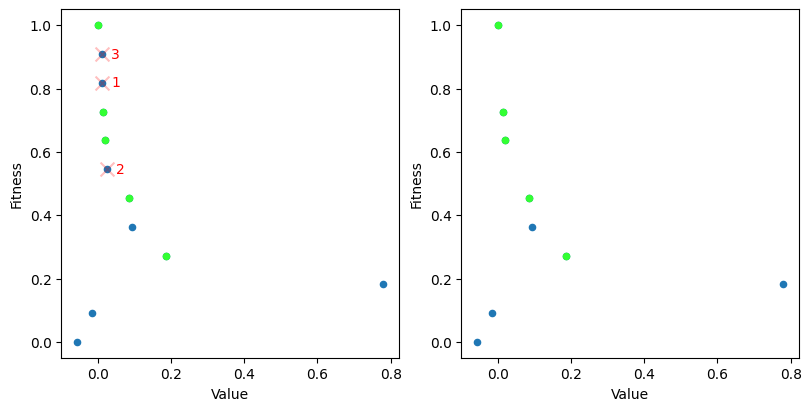

In [10]:
%matplotlib inline

import pickle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def ζ_deletion(population, fitness, ne_indices, amount):
    if amount > len(population):
        raise Exception("Can't delete more elements than the amount in population.")
    data = sorted(
        [ { 'i': i, 'k': e, 'v': fitness[i] } for i, e in enumerate(population) ],
        key=lambda o: o['k'],
    )
    selected_deletion = []
    while len(selected_deletion) < amount:
        e = np.random.choice(range(1, len(data) - 2))
        dist_before = data[e]['k'] - data[e-1]['k']
        dist_after = data[e+1]['k'] - data[e]['k']
        if dist_before < dist_after:
            if data[e]['i'] in ne_indices:
                selected_deletion.append(data.pop(e-1)['i'])
            elif data[e-1]['i'] in ne_indices:
                selected_deletion.append(data.pop(e)['i'])
            elif data[e]['v'] < data[e-1]['v']:
                selected_deletion.append(data.pop(e)['i'])
            else:
                selected_deletion.append(data.pop(e-1)['i'])
        else:
            if data[e]['i'] in ne_indices:
                selected_deletion.append(data.pop(e+1)['i'])
            elif data[e+1]['i'] in ne_indices:
                selected_deletion.append(data.pop(e)['i'])
            elif data[e]['v'] < data[e+1]['v']:
                selected_deletion.append(data.pop(e)['i'])
            else:
                selected_deletion.append(data.pop(e+1)['i'])
    return selected_deletion

with open('history_4_02.pickle', 'rb') as file:
    data = pickle.load(file)
    print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
    phi_zero = data['phi_zero']
    history_4 = data['history_4']
    k_D = data['k_D']
    k_A = data['k_A']
    c = data['c']
    max_dist = data['max_dist']
    p_mutation = data['p_mutation']
    n_entities = data['n_entities']
    n_children = data['n_children']
    n_generations = data['n_generations']
    sims = data['sims']

population = history_4[19]['populations_wc'][0]
fitness = history_4[19]['fitness_wc'][0]
ne_indices = [ ne[0] for ne in history_4[19]['nash_equilibria_wc'] ]
population_ne = [ e for i, e in enumerate(population) if i in ne_indices ]
fitness_ne = [ f for i, f in enumerate(fitness) if i in ne_indices ]
selected_deletion = ζ_deletion(population, fitness, ne_indices, 3)
selected = [ i for i in range(len(population)) if i not in selected_deletion ]
# selected_deletion

fig2 = plt.figure(layout="constrained", figsize=(8, 4))
gs2 = GridSpec(1, 2, figure=fig2)
# gs2 = GridSpec(1, 1, figure=fig2)
ax_before = fig2.add_subplot(gs2[0, 0])
ax_before.scatter(population, fitness, s=20)
ax_before.scatter(population_ne, fitness_ne, s=20, c='#33ff33')
ax_before.set_xlabel('Value')
ax_before.set_ylabel('Fitness')

ax_after = fig2.add_subplot(gs2[0, 1], sharey=ax_before)
new_population = population[selected]
new_fitness = fitness[selected]
new_population_ne = [ e for i, e in enumerate(population) if i in ne_indices and i not in selected_deletion ]
new_fitness_ne = [ f for i, f in enumerate(fitness) if i in ne_indices and i not in selected_deletion ]
ax_after.scatter(new_population, new_fitness, s=20)
ax_after.scatter(new_population_ne, new_fitness_ne, s=20, c='#33ff33')
deleted_population = population[selected_deletion]
deleted_fitness = fitness[selected_deletion]
# ax_after.scatter(deleted_population, deleted_fitness, marker='x')
ax_after.set_xlabel('Value')
ax_after.set_ylabel('Fitness')

ax_before.scatter(deleted_population, deleted_fitness, marker='x', c='red', s=100, alpha=.25)
for i in range(len(selected_deletion)):
    ax_before.text(deleted_population[i] + 0.025, deleted_fitness[i] - 0.0125, f'{i+1}', color='red')
plt.show()

The fitness function:

In [33]:
import time
import concurrent.futures
import numpy as np

import auxiliary_algorithms.util as u
import auxiliary_algorithms.game_theory as gt
import auxiliary_algorithms.leite_dominance as ledo
from auxiliary_algorithms.roulette_wheel import RouletteWheel

def leite_fitness1(S, O, n_players, players_decisions, players_objectives):
    # fitness = np.zeros(S.shape)
    fitness = [ np.zeros(len(population)) for population in S ]
    for p in range(n_players):
        for d in players_decisions[p]:
            # print(f'Assessing decision {d} by player {p}...')
            decision_outcomes = []
            for s in range(O.shape[d]):
                decision_outcomes.append([])
                # other_dsi_iterator = np.ndindex(*[ O.shape[i] if i != d else 1 for i in players_decisions[p] ])
                other_dsi_iterator = np.ndindex(*[ l if i != d else 1 for i, l in enumerate(O.shape[:-1]) ])
                for other_dsi in other_dsi_iterator:
                    other_dsi = list(other_dsi)
                    other_dsi[d] = s
                    # decision_value_outcomes = [ o for i, o in enumerate(O[tuple(other_dsi)]) if i in players_objectives[p] ]
                    # decision_outcomes[s].append(decision_value_outcomes)
                    decision_outcomes[s].append(list(O[tuple(other_dsi)]))
                    # print(f'  {other_dsi} -> {decision_value_outcomes}')
            # print(count_leite_dominance(decision_outcomes, players_objectives))
            fitness[d] = np.array(count_leite_dominance(decision_outcomes, players_objectives))
            ma = fitness[d].max()
            mi = fitness[d].min()
            fitness[d] = (fitness[d] - mi) / (ma - mi) if ma != mi else np.ones(fitness[d].shape)
            # fitness[d] = fitness[d] - mi
            # print(f'ma={ma}, mi={mi}, current_max={fitness[d].max()}, current_min={fitness[d].min()}')
    return fitness

def leite_fitness2(S, O, n_players, players_decisions, players_objectives):
    # fitness = np.zeros(S.shape)
    fitness = [ np.zeros(len(population)) for population in S ]
    for p in range(n_players):
        for d in players_decisions[p]:
            # print(f'Assessing decision {d} by player {p}...')
            other_dsi_iterator = np.ndindex(*[ l if i != d else 1 for i, l in enumerate(O.shape[:-1]) ])
            decision_counts = []
            for other_dsi in other_dsi_iterator:
                decision_outcomes = []
                other_dsi = list(other_dsi)
                for s in range(O.shape[d]):
                    other_dsi[d] = s
                    decision_outcomes.append(list(O[tuple(other_dsi)]))
                decision_counts.append(count_leite_dominance(decision_outcomes, players_objectives))
                # other_dsi[d] = f'0..{O.shape[d]-1}'
                # print(f'... {other_dsi}: {decision_outcomes} → {decision_counts[-1]}')
            fitness[d] = np.array(decision_counts).max(axis=0)
            ma = fitness[d].max()
            mi = fitness[d].min()
            # print(f'... ma={ma}, mi={mi}, fitness[d]={fitness[d]}')
            fitness[d] = (fitness[d] - mi) / (ma - mi) if ma != mi else np.ones(fitness[d].shape)
            # print(f'... ma={fitness[d].max()}, min={fitness[d].min()}, fitness[d]={fitness[d]}')
    return fitness

def leite_fitness(S, O, n_players, players_decisions, players_objectives):
    fitness = [ np.zeros(len(population)) for population in S ]
    for p in range(n_players):
        for d in players_decisions[p]:
            # print(f'Assessing decision {d} by player {p}...')
            other_dsi_iterator = np.ndindex(*[ l if i != d else 1 for i, l in enumerate(O.shape[:-1]) ])
            decision_counts = []
            for other_dsi in other_dsi_iterator:
                decision_outcomes = []
                other_dsi = list(other_dsi)
                for s in range(O.shape[d]):
                    other_dsi[d] = s
                    decision_value_outcomes = [ o for i, o in enumerate(O[tuple(other_dsi)]) if i in players_objectives[p] ]
                    decision_outcomes.append(decision_value_outcomes)
                decision_counts.append(count_pareto_dominance(decision_outcomes))
                # other_dsi[d] = f'0..{O.shape[d]-1}'
                # print(f'... {other_dsi}: {decision_outcomes} → {decision_counts[-1]}')
            fitness[d] = np.array(decision_counts).max(axis=0)
            ma = fitness[d].max()
            mi = fitness[d].min()
            # print(f'... ma={ma}, mi={mi}, fitness[d]={fitness[d]}')
            fitness[d] = (fitness[d] - mi) / (ma - mi) if ma != mi else np.ones(fitness[d].shape)
            # print(f'... ma={fitness[d].max()}, min={fitness[d].min()}, fitness[d]={fitness[d]}')
    return fitness

The outer loop:

In [56]:

def create_payoff_matrix(S, evaluate_fn, concurrent_evaluation=False):
    shape = [ len(population) for population in S ]
    if concurrent_evaluation:
        with concurrent.futures.ProcessPoolExecutor() as executor:
            indices_iter = list(np.ndindex(*shape))
            values_iter = [ tuple(S[i][e] for i, e in enumerate(indices)) for indices in indices_iter ]
            results = { indices_iter[i]: r for i, r in enumerate(executor.map(evaluate_fn, values_iter)) }
            return np.array(u.create_multidimensional_list(
                shape,
                lambda indices: results[indices],
            ))
    return np.array(u.create_multidimensional_list(
        # [ n_entities for p in range(n_players) for _ in range(players_n_decisions[p]) ],
        # lambda indices: evaluate_fn(tuple(S[e][i] for i, e in enumerate(indices))),
        [ len(population) for population in S ],
        lambda indices: evaluate_fn(tuple(S[i][e] for i, e in enumerate(indices))),
    ))

def M4CoEA(
    evaluate_fn,
    crossover_fn,
    mutate_fn,
    initial_population=None,
    players_n_decisions=[ 1, 1 ],
    players_n_objectives=[ 1, 1 ],
    n_entities=50,
    n_children=10,
    n_generations=100,
    p_mutation=0.1,
    rw_base_value=0.1,  # In all tests suffixed with "_05" or less it was 0.01 unless specified otherwise in the data file.
    concurrent_evaluation=False,
):
    n_players = len(players_n_decisions)
    if len(players_n_objectives) != n_players:
        raise Exception('Amount of objective arrays must be equal to the number of players')
    n_decisions = np.sum([ i for i in players_n_decisions ])
    n_objectives = np.sum([ i for i in players_n_objectives ])
    
    start = time.perf_counter()

    # archive = [ [] for p in range(n_players) ]
    archive = []

    d = 0
    o = 0
    players_decisions = []
    players_objectives = []
    for p in range(n_players):
        players_decisions.append([])
        for _ in range(players_n_decisions[p]):
            players_decisions[p].append(d)
            d += 1
        players_objectives.append([])
        for _ in range(players_n_objectives[p]):
            players_objectives[p].append(o)
            o += 1
    # print(f'{n_players} players; {n_decisions} decision variables {players_decisions}; {n_objectives} objectives {players_objectives}')

    # Species:
    if initial_population is None:
        S = [ np.random.rand(n_entities) for _ in range(n_decisions) ]
    else:
        S = initial_population
    # print([ len(population) for population in S ], 'initial S')

    # Keep only unique individuals:
    S = [
        np.array(list(set(S[d]))) for d in range(n_decisions)
    ]
    # if verbose: print([ len(population) for population in S ], f'S @ gen {g+1}')
    populations_time = time.perf_counter() - start
    start = time.perf_counter()

    # Payoff matrix:
    O = create_payoff_matrix(S, evaluate_fn, concurrent_evaluation=concurrent_evaluation)
    # if verbose: print(O, O.shape, f'O @ gen {g+1}')
    payoff_time = time.perf_counter() - start
    start = time.perf_counter()
    
    U = leite_fitness(S, O, n_players, players_decisions, players_objectives)
    # if verbose:
    #     for i, s in enumerate(S):
    #         print(np.array([s, U[i]]), f'S[{i}]|U[{i}] @ gen {g+1}')
    fitness_time = time.perf_counter() - start

    history = [
        {
            'populations': S,
            'populations_time': populations_time,
            'payoff': O,
            'payoff_time': payoff_time,
            'fitness': U,
            'fitness_time': fitness_time,
        },
    ]

    for g in range(n_generations):
        # verbose = g % 10 == 0 or g == n_generations - 1
        verbose = True
        # if verbose: print(f'generation {g+1:6d}')
        print(f'generation {g+1:6d}  |  {"  |  ".join([ f"[{d}]:{S[d].min():.3f}...{S[d].max():.3f}" for d in range(n_decisions) ])}')

        # For each player controlling at least 1 decision variable, there will always be at least
        # one BR per opponent joint strategy (or simply at least one if the opponent does not
        # control any decision variable), meaning that we will always be able to rank the player's
        # entities according to their fitness with respect to the Best Response and Nash Equilibria:
        # best_responses = [
        #     gt.best_response(O, players_decisions[p], players_objectives[p]) for p in range(n_players)
        # ]
        # if verbose: print(best_responses)

        start = time.perf_counter()
        selection_time = crossover_time = mutation_time = 0
        selected_parents = []
        children = []
        selection_time += time.perf_counter() - start
        for d in range(n_decisions):
            start = time.perf_counter()
            selected_parents.append([])
            children.append([])
            # EDIT
            # rw = RouletteWheel(U[d], rw_base_value)
            # /EDIT
            selection_time += time.perf_counter() - start
            for c in range(n_children):
                start = time.perf_counter()
                # EDIT
                # e_a = rw.rand()
                # e_b = rw.rand()
                indices = list(np.random.choice(len(S[d]), 2))
                e_a = np.argmax(U[d][indices])
                e_b = np.argmin(U[d][indices])
                # /EDIT
                selected_parents[-1].append((e_a, e_b))
                selection_time += time.perf_counter() - start
                start = time.perf_counter()
                children[-1].append(crossover_fn(S[d][e_a], S[d][e_b]))
                crossover_time += time.perf_counter() - start
                start = time.perf_counter()
                if np.random.rand() < p_mutation:
                    children[-1][-1] = mutate_fn(children[-1][-1])
                mutation_time += time.perf_counter() - start
        start = time.perf_counter()
        # if verbose: print([ len(population) for population in children ], f'children @ gen {g+1}')
        S_ = [ np.array(list(set(np.concatenate([parents, children[i]])))) for i, parents in enumerate(S) ]
        # if verbose: print([ len(population) for population in S_ ], f'S_ @ gen {g+1}')
        populations_wc_time = time.perf_counter() - start
        start = time.perf_counter()

        # TBD: optimize performance:
        O_ = create_payoff_matrix(S_, evaluate_fn, concurrent_evaluation=concurrent_evaluation)
        # if verbose: print(O_, O_.shape, f'O_ @ gen {g+1}')
        payoff_wc_time = time.perf_counter() - start
        start = time.perf_counter()
        
        best_responses_ = [
            gt.best_response(O_, players_decisions[p], players_objectives[p]) for p in range(n_players)
        ]
        # if verbose: print(best_responses_)
        best_responses_wc_time = time.perf_counter() - start
        start = time.perf_counter()

        NE_ = gt.nash_equilibria(O_, players_decisions, players_objectives, best_responses=best_responses_)
        nash_equilibria_wc_time = time.perf_counter() - start
        start = time.perf_counter()
        
        U_ = leite_fitness(S_, O_, n_players, players_decisions, players_objectives)
        # if verbose:
        #     for i, s in enumerate(S_):
        #         print(np.array([s, U_[i]]), f'S_[{i}]|U_[{i}] @ gen {g+1}')
        fitness_wc_time = time.perf_counter() - start
        start = time.perf_counter()

        new_populations = [ set() for _ in range(n_decisions) ]
        selected_indices = [ [] for _ in range(n_decisions) ]
        # # new_populations = [ [] for _ in range(n_decisions) ]
        # for ne in NE_:
        #     for d, e in enumerate(ne):
        #         if len(new_populations[d]) < n_entities:
        #             # print(f"Adding {S_[d][e]} to population {d} due to NE_ @ indices{ne}")
        #             len_before = len(new_populations[d])
        #             new_populations[d].add(S_[d][e])
        #             if len(new_populations[d]) != len_before:
        #                 selected_indices[d].append(e)
        # new_populations = [ list(new_populations[i]) for i in range(n_decisions) ]
        # for d in range(n_decisions):
        #     # for i, u in enumerate(U[d][:]):
        #     #     if u > 0:
        #     #         new_populations[d].add(S[d][i])
        #     # e = n_entities + n_children
        #     # while e > 0 and len(new_populations[d]) < n_entities:
        #     #     e -= 1
        #     #     new_populations[d].add(S_[d][e])
        #     # e = 0
        #     # while e < n_entities + n_children and len(new_populations[d]) < n_entities:
        #     #     new_populations[d].add(S_[d][e])
        #     #     e += 1
        #     rw = RouletteWheel(U_[d], rw_base_value)
        #     while len(new_populations[d]) < n_entities:
        #         e = rw.rand()
        #         new_populations[d].append(S_[d][e])
        #         selected_indices[d].append(e)
        for d in range(n_decisions):
            ne_indices = [ ne[d] for ne in NE_ ]
            deleted_indices = ζ_deletion(S_[d], U_[d], ne_indices, len(S_[d]) - n_entities)
            selected_indices[d] = [ e for e in range(len(S_[d])) if e not in deleted_indices ]
            new_populations[d] = [ S_[d][e] for e in selected_indices[d] ]
        S = [ np.array(p) for p in new_populations ]
        # if verbose: print(S, S.shape, 'new S')
        populations_time = time.perf_counter() - start
        start = time.perf_counter()

        for o in list_nes(NE_, O_, S_):
            # for p in range(n_players):
            #     ledo.non_leite_dominated_insert(archive[p], {
            #         'point': o['point'],
            #         'value': o['value'],
            #     })
            if len(archive) < 1000000:
                ledo.non_leite_dominated_insert(archive, {
                    'point': o['point'],
                    'value': o['value'],
                }, players_objectives)
        archive_time = time.perf_counter() - start
        if verbose:
            # print('NE in population:')
            print_nes(NE_, O_, S_)
            # for p in range(n_players):
            #     print(f"NE in Player {p}'s archive:")
            #     print_nes(archive, nes_is_object_list=True)
            # print('NE in archive:')
            # print_nes(archive, nes_is_object_list=True)

        # Keep only unique individuals:
        # S = [
        #     np.array(list(set(S[d]))) for d in range(n_decisions)
        # ]
        # if verbose: print([ len(population) for population in S ], f'S @ gen {g+1}')

        start = time.perf_counter()
        # Payoff matrix:
        O = filter_array(O_, selected_indices)
        # if verbose: print(O, O.shape, f'O @ gen {g+1}')
        payoff_time = time.perf_counter() - start
        start = time.perf_counter()

        # TBD: Reuse U_ calculated above:
        U = leite_fitness(S, O, n_players, players_decisions, players_objectives)
        # if verbose:
        #     for i, s in enumerate(S):
        #         print(np.array([s, U[i]]), f'S[{i}]|U[{i}] @ gen {g+1}')
        fitness_time = time.perf_counter() - start

        history.append({
            'selected_parents': selected_parents,
            'selection_time': selection_time,
            'crossover_time': crossover_time,
            'mutation_time': mutation_time,
            'populations_wc': S_,
            'populations_wc_time': populations_wc_time,
            'payoff_wc': O_,
            'payoff_wc_time': payoff_wc_time,
            'best_responses_wc': best_responses_,
            'best_responses_wc_time': best_responses_wc_time,
            'nash_equilibria_wc': NE_,
            'nash_equilibria_wc_time': nash_equilibria_wc_time,
            'fitness_wc': U_,
            'fitness_wc_time': fitness_wc_time,
            'archive': archive[:],
            'archive_time': archive_time,
            'selected_indices': selected_indices,
            'populations': S,
            'populations_time': populations_time,
            'payoff': O,
            'payoff_time': payoff_time,
            'fitness': U,
            'fitness_time': fitness_time,
        })

    # return archive
    # print(f'{len(archive)} NE in archive')
    # print_nes(archive, nes_is_object_list=True)
    # return list_nes(NE_, O_, S_)
    return history

def extract_M4CoEA_results(history, print_archive=False):
    ne_archive = history[-1]['archive']
    ne_points_archive = [ ne['point'] for ne in ne_archive ]
    ne_population = list_nes(history[-1]['nash_equilibria_wc'], history[-1]['payoff_wc'], history[-1]['populations_wc'])
    ne_points_population = [ ne['point'] for ne in ne_population ]
    ne_archive_unique = sum([ 1 for p in ne_points_archive if p not in ne_points_population ])
    ne_archive_shared = sum([ 1 for p in ne_points_archive if p in ne_points_population ])
    ne_population_unique = sum([ 1 for p in ne_points_population if p not in ne_points_archive ])
    ne_population_shared = sum([ 1 for p in ne_points_population if p in ne_points_archive ])
    print(f"{len(ne_archive)} NE in archive    ({ne_archive_unique} unique, {ne_archive_shared} shared) @ gen. {len(history) - 1}")
    if print_archive:
        print_nes(ne_archive, nes_is_object_list=True)
    print(f"{len(ne_population)} NE in population ({ne_population_unique} unique, {ne_population_shared} shared) @ gen. {len(history) - 1}")
    return ne_population

### Solving original matrix from Example 6

In [61]:
import pickle
import time

max_dist = 2.0
p_mutation = 0.0
n_entities = 10
n_children = 5
n_generations=200
rw_base_value=0.1

initial_population = np.array(np.random.randint(0, 3, (3, 5)), dtype=float)
# initial_population[0, 0] = 0.0  # For (0.0, 1.0, 2.0) and (0.0, 1.0, 3.0).
# initial_population[0, 1] = 1.0  # For (1.0, 1.0, 9.0)
# initial_population[1, 0] = 1.0  # For (0.0, 1.0, 2.0), (0.0, 1.0, 3.0) and (1.0, 1.0, 9.0)
# initial_population[2, 0] = 2.0  # For (0.0, 1.0, 2.0)
# initial_population[2, 1] = 3.0  # For (0.0, 1.0, 3.0)
# initial_population[2, 2] = 9.0  # For (1.0, 1.0, 9.0)
# Expected solution (analytical & brute force):
# Nash Equilibrium (0, 1, 2) with outcomes [10  0  4]
# Nash Equilibrium (0, 1, 3) with outcomes [8 0 4]
# Nash Equilibrium (1, 1, 9) with outcomes [2 1 4]

start = time.perf_counter()
history_1 = M4CoEA(
    evaluate_fn=lambda solution: payoff_rounding_evaluator(payoff_6, solution),
    crossover_fn=lambda parent_a, parent_b: round(parent_a + (np.random.rand()*2 - 1)*max_dist), # 4.0
    mutate_fn=lambda child: round(child + (np.random.rand()*2 - 1)*max_dist),    # 4.0
    initial_population=initial_population,  # np.random.randint(0, 3, (3, 5)),
    p_mutation=p_mutation, # 0.4,
    players_n_decisions=[ 2, 1 ],
    players_n_objectives=[ 2, 1 ],
    n_entities=n_entities,
    n_children=n_children,
    n_generations=n_generations,
    rw_base_value=rw_base_value,
)
finish = time.perf_counter()

# with open('history_1_03.pickle', 'wb') as file:
#     pickle.dump({
#         'description': 'Example 6 with leite_fitness3',
#         'history_1': history_1,
#         'max_dist': max_dist,
#         'p_mutation': p_mutation,
#         'n_entities': n_entities,
#         'n_children': n_children,
#         'n_generations': n_generations,
#         'rw_base_value': rw_base_value,
#         'execution_time': finish - start,
#     }, file)

# with open('history_1_03.pickle', 'rb') as file:
#     data = pickle.load(file)
#     print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
#     history_1 = data['history_1']
#     max_dist = data['max_dist']
#     p_mutation = data['p_mutation']
#     n_entities = data['n_entities']
#     n_children = data['n_children']
#     n_generations = data['n_generations']
#     rw_base_value = data['rw_base_value'] if 'rw_base_value' in data else None

extract_M4CoEA_results(history_1, print_archive=True)

generation      1  |  [0]:0.000...2.000  |  [1]:0.000...2.000  |  [2]:0.000...2.000
Nash Equilibrium (1.0, 2.0, 2.0) with outcomes [3. 0. 8.]
generation      2  |  [0]:-2.000...2.000  |  [1]:0.000...4.000  |  [2]:-2.000...2.000
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
generation      3  |  [0]:-2.000...3.000  |  [1]:0.000...4.000  |  [2]:-2.000...2.000
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
generation      4  |  [0]:-2.000...3.000  |  [1]:0.000...4.000  |  [2]:-2.000...2.000
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
generation      5  |  [0]:-2.000...3.000  |  [1]:-1.000...4.000  |  [2]:-2.000...2.000
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
generation      6  |  [0]:-2.000...3.000  |  [1]:-2.000...4.000  |  [2]:-2.000...2.000
Nash Equilibrium (0.0, 1.0, 2.0) with outcomes [10.  0.  4.]
generation      7  |  [0]:-2.000...3.000  |  [1]:-2.000...4.000  |  [2]:-2.000...2.000
Nash Equilibrium (0.0, 1.0, 2.0) w

[{'point': (0.0, 1.0, 2.0), 'value': array([10.,  0.,  4.])},
 {'point': (0.0, 1.0, 3.0), 'value': array([8., 0., 4.])}]

Plotting results:

<Figure size 640x480 with 0 Axes>

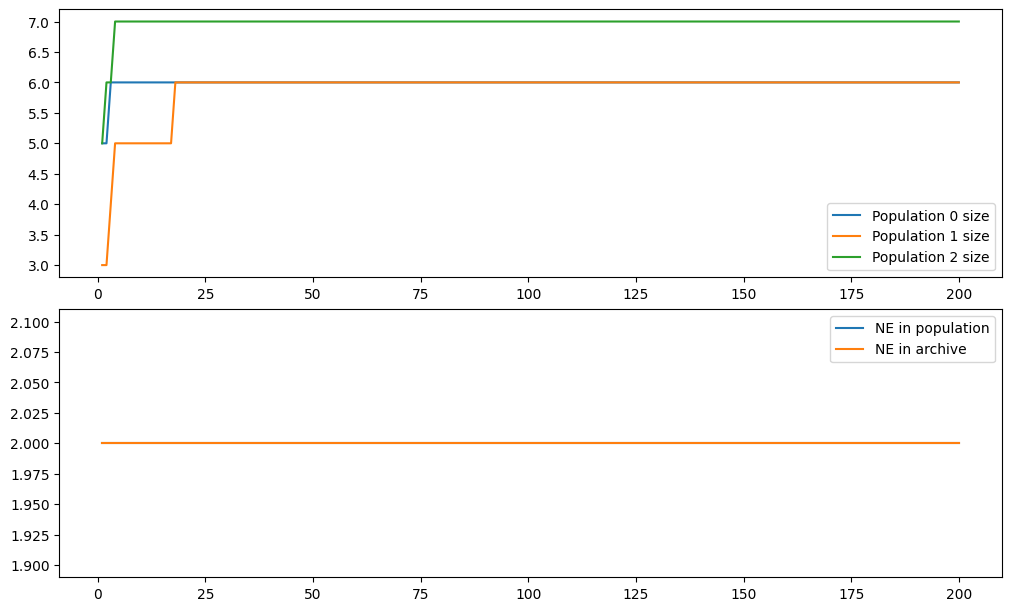

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_overview(history):
    plt.clf()
    x = range(1, len(history))

    fig3 = plt.figure(layout="constrained", figsize=(10, 6))
    gs2 = GridSpec(2, 1, figure=fig3)
    ax_population_size = fig3.add_subplot(gs2[0, 0])
    y0 = [ len(history[gen]['populations_wc'][0]) for gen in x ]
    ax_population_size.plot(x, y0, label='Population 0 size')
    y1 = [ len(history[gen]['populations_wc'][1]) for gen in x ]
    ax_population_size.plot(x, y1, label='Population 1 size')
    y2 = [ len(history[gen]['populations_wc'][2]) for gen in x ]
    ax_population_size.plot(x, y2, label='Population 2 size')
    ax_population_size.legend()

    ax_after = fig3.add_subplot(gs2[1, 0], sharex=ax_population_size)
    pn = [ len(history[gen]['nash_equilibria_wc']) for gen in x ]
    ax_after.plot(x, pn, label='NE in population')
    an = [ len(history[gen]['archive']) for gen in x ]
    ax_after.plot(x, an, label='NE in archive')
    ax_after.legend()

    plt.show()

plot_overview(history_1)

SelectionSlider(description='Generation:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…

Output()

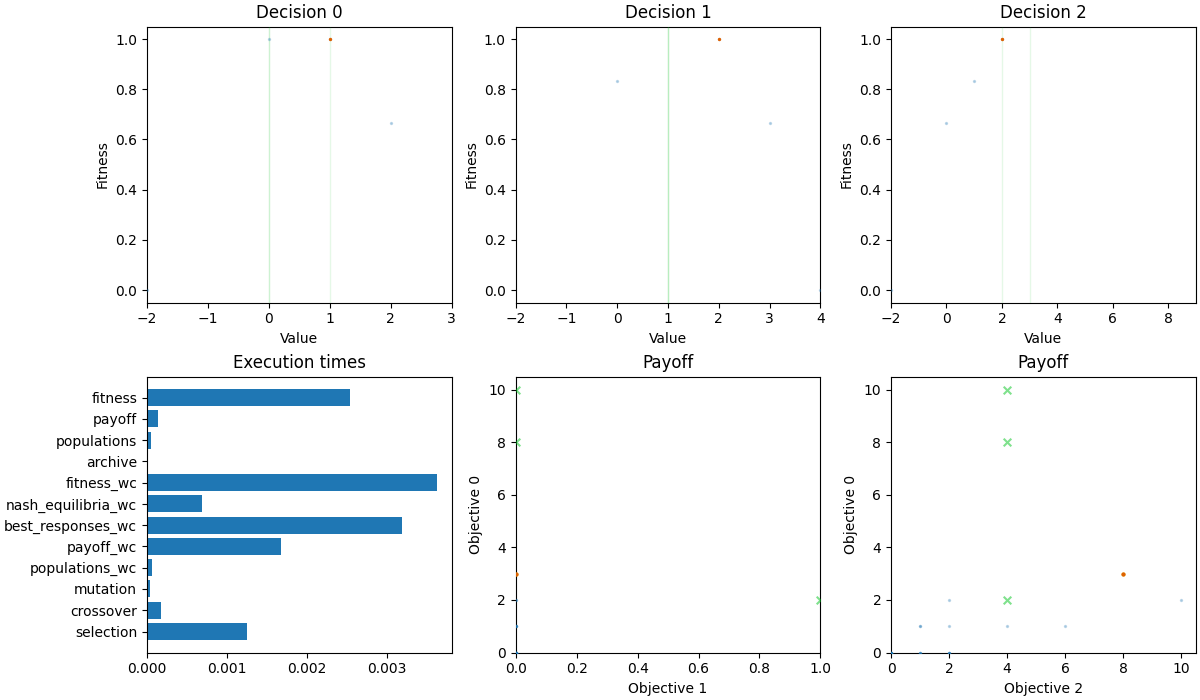

In [70]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import ipywidgets as widgets
from ipywidgets import interactive_output
from IPython.display import display

def plot_interactive_results(history, ne_population_fn, payoff_matrix=None):

    # Function to update the plots based on the selected generation
    def update_plots(gen):

        population_point_alpha=0.25
        archive_ne_line_color='#ab9f1a'
        archive_ne_line_alpha=0.05
        archive_ne_point_color='#edc600'
        archive_ne_point_alpha=0.75
        population_ne_line_color='#de6102'
        population_ne_line_alpha=0.05
        population_ne_point_color='#de6102'
        population_ne_point_alpha=1.00
        population_ne_deleted_color='#ff0000'
        population_ne_deleted_alpha=0.25
        analytical_ne_line_color='#00c41d'
        analytical_ne_line_alpha=0.10
        analytical_ne_point_color='#00c41d'
        analytical_ne_point_alpha=0.5
        
        populations_wc = history[gen]['populations_wc']
        fitness_wc = history[gen]['fitness_wc']
        ne_population_entities = [ set([ ne['point'][d] for ne in ne_population[gen-1] ]) for d in range(3) ]
        populations_wc_ne = [ [ e for e in populations_wc[d] if e in ne_population_entities[d] ] for d in range(3) ]
        fitness_wc_ne = [ [ fitness_wc[d][i] for i, e in enumerate(populations_wc[d]) if e in ne_population_entities[d] ] for d in range(3) ]
        deleted_indices = [ [ i for i in range(len(populations_wc[d])) if i not in history[gen]['selected_indices'][d] ] for d in range(3) ]
        populations_wc_deleted = [ [ e for i, e in enumerate(populations_wc[d]) if i in deleted_indices[d] ] for d in range(3) ]
        fitness_wc_deleted = [ [ f for i, f in enumerate(fitness_wc[d]) if i in deleted_indices[d] ] for d in range(3) ]

        # Update fitness plots:
        ax_population_0.cla()
        ax_population_1.cla()
        ax_population_2.cla()
        # for ne in history[gen]['archive']:
        #     ax_population_0.axvline(x=ne['point'][0], linewidth=1, color=archive_ne_line_color, alpha=archive_ne_line_alpha, zorder=20)
        # for ne in ne_population[gen-1]:
        #     ax_population_0.axvline(x=ne['point'][0], linewidth=1, color=population_ne_line_color, alpha=population_ne_line_alpha, zorder=30)
        for ne in ne_analytical:
            ax_population_0.axvline(x=ne['point'][0], linewidth=1, color=analytical_ne_line_color, alpha=analytical_ne_line_alpha, zorder=40)
        ax_population_0.scatter(populations_wc[0], fitness_wc[0], s=2, alpha=population_point_alpha, zorder=50)
        ax_population_0.scatter(populations_wc_ne[0], fitness_wc_ne[0], s=2, alpha=population_ne_point_alpha, c=population_ne_point_color, zorder=60)
        ax_population_0.set_xlim(min(min_point_ne_global[0], min_individuals_global[0]), max(max_point_ne_global[0], max_individuals_global[0]))
        ax_population_0.scatter(populations_wc_deleted[0], fitness_wc_deleted[0], s=20, marker='x', alpha=population_ne_deleted_alpha, c=population_ne_deleted_color, zorder=70)
        ax_population_0.set_xlabel('Value')
        ax_population_0.set_ylabel('Fitness')
        ax_population_0.set_title('Decision 0')
        # for ne in history[gen]['archive']:
        #     ax_population_1.axvline(x=ne['point'][1], linewidth=1, color=archive_ne_line_color, alpha=archive_ne_line_alpha, zorder=20)
        # for ne in ne_population[gen-1]:
        #     ax_population_1.axvline(x=ne['point'][1], linewidth=1, color=population_ne_line_color, alpha=population_ne_line_alpha, zorder=30)
        for ne in ne_analytical:
            ax_population_1.axvline(x=ne['point'][1], linewidth=1, color=analytical_ne_line_color, alpha=analytical_ne_line_alpha, zorder=40)
        ax_population_1.scatter(populations_wc[1], fitness_wc[1], s=2, alpha=population_point_alpha, zorder=50)
        ax_population_1.scatter(populations_wc_ne[1], fitness_wc_ne[1], s=2, alpha=population_ne_point_alpha, c=population_ne_point_color, zorder=60)
        ax_population_1.set_xlim(min(min_point_ne_global[1], min_individuals_global[1]), max(max_point_ne_global[1], max_individuals_global[1]))
        ax_population_1.scatter(populations_wc_deleted[1], fitness_wc_deleted[1], s=20, marker='x', alpha=population_ne_deleted_alpha, c=population_ne_deleted_color, zorder=70)
        ax_population_1.set_xlabel('Value')
        ax_population_1.set_ylabel('Fitness')
        ax_population_1.set_title('Decision 1')
        # for ne in history[gen]['archive']:
        #     ax_population_2.axvline(x=ne['point'][2], linewidth=1, color=archive_ne_line_color, alpha=archive_ne_line_alpha, zorder=20)
        # for ne in ne_population[gen-1]:
        #     ax_population_2.axvline(x=ne['point'][2], linewidth=1, color=population_ne_line_color, alpha=population_ne_line_alpha, zorder=30)
        for ne in ne_analytical:
            ax_population_2.axvline(x=ne['point'][2], linewidth=1, color=analytical_ne_line_color, alpha=analytical_ne_line_alpha, zorder=40)
        ax_population_2.scatter(populations_wc[2], fitness_wc[2], s=2, alpha=population_point_alpha, zorder=50)
        ax_population_2.scatter(populations_wc_ne[2], fitness_wc_ne[2], s=2, alpha=population_ne_point_alpha, c=population_ne_point_color, zorder=60)
        ax_population_2.set_xlim(min(min_point_ne_global[2], min_individuals_global[2]), max(max_point_ne_global[2], max_individuals_global[2]))
        ax_population_2.scatter(populations_wc_deleted[2], fitness_wc_deleted[2], s=20, marker='x', alpha=population_ne_deleted_alpha, c=population_ne_deleted_color, zorder=70)
        ax_population_2.set_title('Population 2')
        ax_population_2.set_xlabel('Value')
        ax_population_2.set_ylabel('Fitness')
        ax_population_2.set_title('Decision 2')
        
        # Update execution times plot:
        ax_time.cla()
        y_pos = range(len(execution_times[gen-1]))
        ax_time.barh(y_pos, execution_times[gen-1], align='center')
        ax_time.set_yticks(y_pos, labels=time_labels)
        ax_time.set_title('Execution times')
        
        # # Update payoff 3D plot:
        # ax_payoffs.cla()
        # ax_payoffs.scatter(payoff_outcomes[0][gen-1], payoff_outcomes[1][gen-1], payoff_outcomes[2][gen-1])
        # # ax_payoffs.set_xlim(min_payoff_outcomes_global[0], max_payoff_outcomes_global[0])
        # ax_payoffs.set_xlabel('Objective 0')
        # # ax_payoffs.set_ylim(min_payoff_outcomes_global[1], max_payoff_outcomes_global[1])
        # ax_payoffs.set_ylabel('Objective 1')
        # # ax_payoffs.set_zlim(min_payoff_outcomes_global[2], max_payoff_outcomes_global[2])
        # ax_payoffs.set_zlabel('Objective 2')
        # ax_payoffs.set_title('Payoff')
        
        # Update payoff plots:
        ax_payoffs_01.cla()
        ax_payoffs_01.scatter(payoff_outcomes[1][gen-1], payoff_outcomes[0][gen-1], s=2, alpha=population_point_alpha, zorder=30)
        for k, ne in enumerate(history[gen]['archive']):
            # ax_payoffs_01.axvline(x=ne['value'][1], linewidth=1, color=archive_ne_line_color, alpha=archive_ne_line_alpha, zorder=20)
            # ax_payoffs_01.axhline(y=ne['value'][0], linewidth=1, color=archive_ne_line_color, alpha=archive_ne_line_alpha, zorder=20)
            ax_payoffs_01.scatter(ne['value'][1], ne['value'][0], s=4 if not 'archive_rank' in history[gen] else history[gen]['archive_rank'][k]*10+1, color=archive_ne_point_color, alpha=archive_ne_point_alpha, zorder=40)
        for ne in ne_population[gen-1]:
            # ax_payoffs_01.axvline(x=ne['value'][1], linewidth=1, color=population_ne_line_color, alpha=population_ne_line_alpha, zorder=20)
            # ax_payoffs_01.axhline(y=ne['value'][0], linewidth=1, color=population_ne_line_color, alpha=population_ne_line_alpha, zorder=20)
            ax_payoffs_01.scatter(ne['value'][1], ne['value'][0], s=4, color=population_ne_point_color, alpha=population_ne_point_alpha, zorder=50)
        for ne in ne_analytical:
            # ax_payoffs_01.axvline(x=ne['value'][1], linewidth=1, color=analytical_ne_line_color, alpha=analytical_ne_line_alpha, zorder=20)
            # ax_payoffs_01.axhline(y=ne['value'][0], linewidth=1, color=analytical_ne_line_color, alpha=analytical_ne_line_alpha, zorder=20)
            ax_payoffs_01.scatter(ne['value'][1], ne['value'][0], s=30, marker='x', color=analytical_ne_point_color, alpha=analytical_ne_point_alpha, zorder=20)
            # ax_payoffs_01.plot(ne['value'][1], ne['value'][0], color=analytical_ne_point_color)
        ax_payoffs_01.set_xlim(min(min_payoff_ne_global[1], min_payoff_outcomes_global[1]), max(max_payoff_ne_global[1], max_payoff_outcomes_global[1]))
        ax_payoffs_01.set_xlabel('Objective 1')
        ax_payoffs_01.set_ylim(min(min_payoff_ne_global[0], min_payoff_outcomes_global[0]), max(max_payoff_ne_global[0], max_payoff_outcomes_global[0]))
        ax_payoffs_01.set_ylabel('Objective 0')
        ax_payoffs_01.set_title('Payoff')
        ax_payoffs_02.cla()
        ax_payoffs_02.scatter(payoff_outcomes[2][gen-1], payoff_outcomes[0][gen-1], s=2, alpha=population_point_alpha, zorder=30)
        for k, ne in enumerate(history[gen]['archive']):
            # ax_payoffs_02.axvline(x=ne['value'][2], linewidth=1, color=archive_ne_line_color, alpha=archive_ne_line_alpha, zorder=20)
            # ax_payoffs_02.axhline(y=ne['value'][0], linewidth=1, color=archive_ne_line_color, alpha=archive_ne_line_alpha, zorder=20)
            ax_payoffs_02.scatter(ne['value'][2], ne['value'][0], s=4 if not 'archive_rank' in history[gen] else history[gen]['archive_rank'][k]*10+1, color=archive_ne_point_color, alpha=archive_ne_point_alpha, zorder=40)
        for ne in ne_population[gen-1]:
            # ax_payoffs_02.axvline(x=ne['value'][2], linewidth=1, color=population_ne_line_color, alpha=population_ne_line_alpha, zorder=20)
            # ax_payoffs_02.axhline(y=ne['value'][0], linewidth=1, color=population_ne_line_color, alpha=population_ne_line_alpha, zorder=20)
            ax_payoffs_02.scatter(ne['value'][2], ne['value'][0], s=4, color=population_ne_point_color, alpha=population_ne_point_alpha, zorder=50)
        for ne in ne_analytical:
            # ax_payoffs_02.axvline(x=ne['value'][2], linewidth=1, color=analytical_ne_line_color, alpha=analytical_ne_line_alpha, zorder=20)
            # ax_payoffs_02.axhline(y=ne['value'][0], linewidth=1, color=analytical_ne_line_color, alpha=analytical_ne_line_alpha, zorder=20)
            ax_payoffs_02.scatter(ne['value'][2], ne['value'][0], s=30, marker='x', color=analytical_ne_point_color, alpha=analytical_ne_point_alpha, zorder=20)
            # ax_payoffs_02.plot(ne['value'][2], ne['value'][0], color=analytical_ne_point_color)
        ax_payoffs_02.set_xlim(min(min_payoff_ne_global[2], min_payoff_outcomes_global[2]), max(max_payoff_ne_global[2], max_payoff_outcomes_global[2]))
        ax_payoffs_02.set_xlabel('Objective 2')
        ax_payoffs_02.set_ylim(min(min_payoff_ne_global[0], min_payoff_outcomes_global[0]), max(max_payoff_ne_global[0], max_payoff_outcomes_global[0]))
        ax_payoffs_02.set_ylabel('Objective 0')
        ax_payoffs_02.set_title('Payoff')

        fig.canvas.draw_idle()
    
    min_individuals_global = [ min([ min(o['populations_wc'][d]) for o in history[1:] ]) for d in range(3) ]
    max_individuals_global = [ max([ max(o['populations_wc'][d]) for o in history[1:] ]) for d in range(3) ]
    ne_population = [ list_nes(o['nash_equilibria_wc'], o['payoff_wc'], o['populations_wc']) for o in history[1:] ]
    # ne_analytical = list_analytical_ne(np.linspace(max(0, min_individuals_global[0]), max_individuals_global[0], 25))
    ne_analytical = ne_population_fn(min_individuals_global, max_individuals_global)
    min_point_ne_global = [ min(*[ ne['point'][d] for ne in ne_analytical ]) for d in range(3) ]
    max_point_ne_global = [ max(*[ ne['point'][d] for ne in ne_analytical ]) for d in range(3) ]
    time_labels = [
        'selection', 'crossover', 'mutation', 'populations_wc', 'payoff_wc', 'best_responses_wc',
        'nash_equilibria_wc', 'fitness_wc', 'archive', 'populations', 'payoff', 'fitness'
    ]
    execution_times = [ [ o[f'{l}_time'] for l in time_labels ] for o in history[1:] ]
    positive_variables_indices = [ [ [ e for e, v in enumerate(o['populations_wc'][d]) if v >= 0 and (payoff_matrix is None or v <= payoff_matrix.shape[d] - 1) ] for o in history[1:] ] for d in range(3) ]
    positive_variables_indices_tuples = [ u.create_multidimensional_list(
        [ len(positive_variables_indices[d][g-1]) for d in range(3) ],
        lambda indices: tuple(positive_variables_indices[d][g-1][i] for d, i in enumerate(indices)),
    ) for g in range(1, len(history)) ]
    positive_variables_indices_tuples = [ np.array(o).reshape(-1, 3) for o in positive_variables_indices_tuples ]
    positive_variables_values_tuples = [ np.array([[ history[g+1]['populations_wc'][d][e] for d, e in enumerate(indices) ] for indices in tuples]) for g, tuples in enumerate(positive_variables_indices_tuples) ]
    positive_variables_outcomes = [ np.array([ history[g+1]['payoff_wc'][tuple(indices)] for indices in tuples ]) for g, tuples in enumerate(positive_variables_indices_tuples) ]
    payoff_outcomes = [ [ o['payoff_wc'].reshape(-1, o['payoff_wc'].shape[-1])[:, d] for o in history[1:] ] for d in range(3) ]
    max_payoff_outcomes_global = [ max([ outcomes[:, j].max()*1.05 for outcomes in positive_variables_outcomes]) for j in range(3) ]
    min_payoff_outcomes_global = [ min([ outcomes[:, j].min()*1.05 for outcomes in positive_variables_outcomes]) for j in range(3) ]
    min_payoff_ne_global = [ min(*[ ne['value'][d] for ne in ne_analytical ]) for d in range(3) ]
    max_payoff_ne_global = [ max(*[ ne['value'][d] for ne in ne_analytical ]) for d in range(3) ]

    fig = plt.figure(layout="constrained", figsize=(12, 7))
    gs = GridSpec(2, 3, figure=fig)
    ax_population_0 = fig.add_subplot(gs[0, 0])
    ax_population_1 = fig.add_subplot(gs[0, 1])
    ax_population_2 = fig.add_subplot(gs[0, 2])
    ax_time = fig.add_subplot(gs[1:, 0])
    # ax_payoffs = fig.add_subplot(gs[1:, 1:], projection='3d')
    ax_payoffs_01 = fig.add_subplot(gs[1:, 1])
    ax_payoffs_02 = fig.add_subplot(gs[1:, 2], sharey=ax_payoffs_01)

    slider = widgets.SelectionSlider(
        options=range(1, len(history)),
        value=1,
        description='Generation:',
    )
    out = interactive_output(update_plots, {'gen': slider})
    display(slider, out)

plot_interactive_results(history_1, lambda min_individuals_global, max_individuals_global: [
    { 'point': (0, 1, 2), 'value': [10,  0,  4] },
    { 'point': (0, 1, 3), 'value': [ 8,  0,  4] },
    { 'point': (1, 1, 9), 'value': [ 2,  1,  4] },
], payoff_6)

In [40]:
history_1[1]['populations'][0]

array([0., 1., 2.])

### Solving interpolated matrix from Example 6

In [62]:
import pickle
import time

max_dist = 0.5
p_mutation = 0.0 # 0.4
n_entities=10
n_children=5
rw_base_value=0.1
n_generations=200

points_6 = tuple(np.arange(l) for l in payoff_6.shape[:-1])

def evaluate_interpolation(solution):
    return payoff_interpolation_evaluator(payoff_6, points_6, solution)

# Expected solution (analytical & brute force):
# Nash Equilibrium (0, 1, 2) with outcomes [10  0  4]
#               ... and everything in between until ...
# Nash Equilibrium (0, 1, 3) with outcomes [8 0 4]
# Nash Equilibrium (1, 1, 9) with outcomes [2 1 4]

start = time.perf_counter()
history_2 = M4CoEA(
    evaluate_fn=evaluate_interpolation,
    # crossover_fn=lambda parent_a, parent_b: crossover_fn(parent_a, parent_b, 2.0),
    crossover_fn=lambda parent_a, parent_b: parent_a + (np.random.rand()*2 - 1)*max_dist,    # 4.0
    mutate_fn=lambda child: child + (np.random.rand()*2 - 1)*max_dist,   # 4.0
    p_mutation=p_mutation, # 0.4,
    players_n_decisions=[ 2, 1 ],
    players_n_objectives=[ 2, 1 ],
    n_entities=n_entities,
    n_children=n_children,
    n_generations=n_generations,
    rw_base_value=rw_base_value,
    concurrent_evaluation=False, # True deixa mais lento!
)
finish = time.perf_counter()

# with open('history_2_07.pickle', 'wb') as file:
#     pickle.dump({
#         'description': 'Interpolated Example 6 with leite_fitness3',
#         'history_2': history_2,
#         'max_dist': max_dist,
#         'p_mutation': p_mutation,
#         'n_entities': n_entities,
#         'n_children': n_children,
#         'n_generations': n_generations,
#         'rw_base_value': rw_base_value,
#         'execution_time': finish - start,
#     }, file)

# with open('history_2_05.pickle', 'rb') as file:
#     data = pickle.load(file)
#     print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
#     history_2 = data['history_2']
#     max_dist = data['max_dist']
#     p_mutation = data['p_mutation']
#     n_entities = data['n_entities']
#     n_children = data['n_children']
#     n_generations = data['n_generations']
#     rw_base_value = data['rw_base_value'] if 'rw_base_value' in data else None

extract_M4CoEA_results(history_2, print_archive=True)

generation      1  |  [0]:0.026...0.905  |  [1]:0.068...0.982  |  [2]:0.145...0.943
Nash Equilibrium (0.026360235622720163, 0.9815309601393142, 0.943125763273579) with outcomes [1.84397188 0.         1.89832418]
generation      2  |  [0]:0.026...0.905  |  [1]:0.216...1.024  |  [2]:-0.305...0.943
Nash Equilibrium (0.026360235622720163, 0.9815309601393142, 0.943125763273579) with outcomes [1.84397188 0.         1.89832418]
generation      3  |  [0]:-0.071...0.905  |  [1]:0.183...1.024  |  [2]:-0.305...0.943
Nash Equilibrium (0.026360235622720163, 0.9815309601393142, 1.4037613848414783) with outcomes [5.05993548 0.         2.74478973]
generation      4  |  [0]:-0.095...0.905  |  [1]:0.216...1.031  |  [2]:-0.305...1.404
Nash Equilibrium (0.026360235622720163, 0.9815309601393142, 1.4037613848414783) with outcomes [5.05993548 0.         2.74478973]
generation      5  |  [0]:-0.095...1.059  |  [1]:0.216...1.031  |  [2]:-0.308...1.404
Nash Equilibrium (0.026360235622720163, 0.9815309601393142,

[{'point': (0.0007592751344887017, 0.9995700428530737, 2.9931400443987766),
  'value': array([8.00614283, 0.        , 3.99912967])}]

Plotting results:

<Figure size 1728x1008 with 0 Axes>

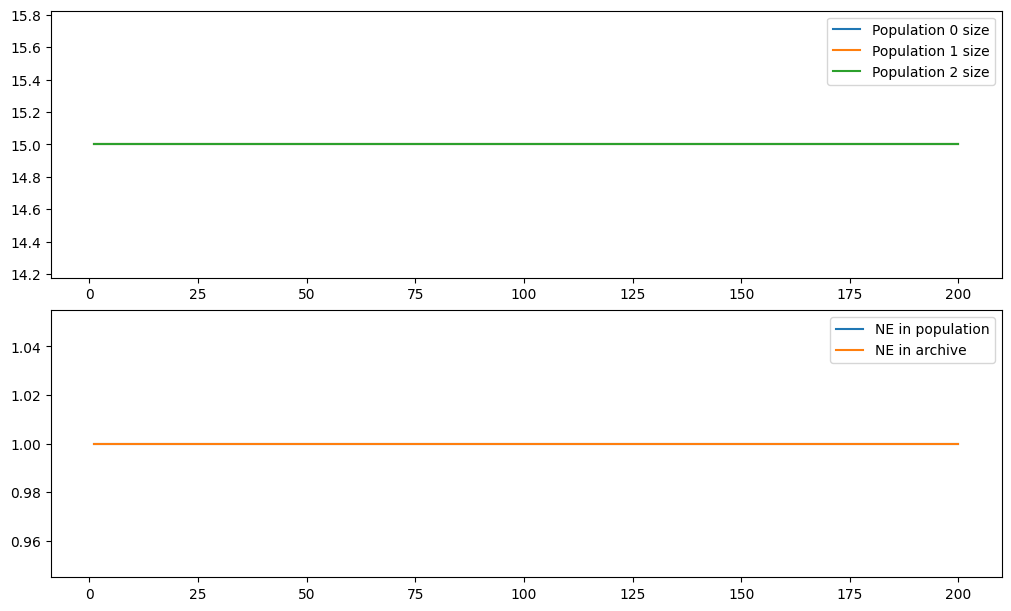

In [63]:
%matplotlib inline

plot_overview(history_2)

SelectionSlider(description='Generation:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…

Output()

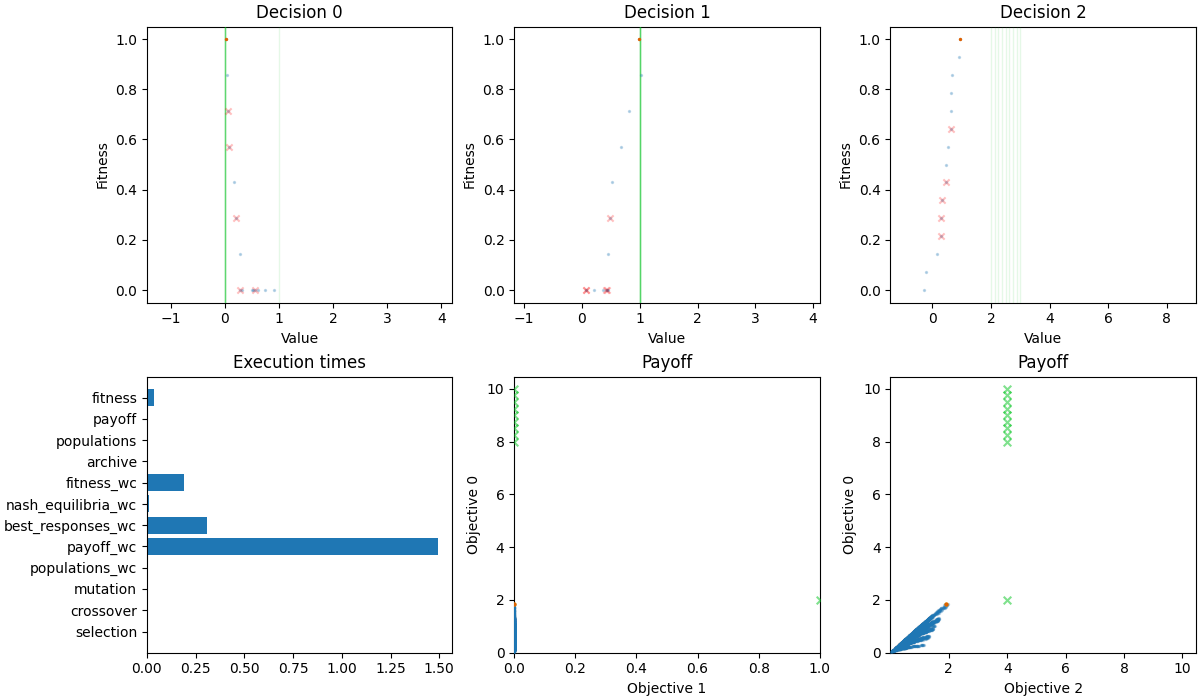

In [71]:
%matplotlib widget

plot_interactive_results(history_2, lambda min_individuals_global, max_individuals_global: [
    { 'point': (0, 1, 2    ), 'value': [10   ,  0,  4] },
    { 'point': (0, 1, 2.125), 'value': [ 9.75,  0,  4] },
    { 'point': (0, 1, 2.25 ), 'value': [ 9.5 ,  0,  4] },
    { 'point': (0, 1, 2.375), 'value': [ 9.25,  0,  4] },
    { 'point': (0, 1, 2.5  ), 'value': [ 9.  ,  0,  4] },
    { 'point': (0, 1, 2.625), 'value': [ 8.75,  0,  4] },
    { 'point': (0, 1, 2.75 ), 'value': [ 8.5 ,  0,  4] },
    { 'point': (0, 1, 2.875), 'value': [ 8.25,  0,  4] },
    { 'point': (0, 1, 3    ), 'value': [ 8   ,  0,  4] },
    { 'point': (1, 1, 9    ), 'value': [ 2   ,  1,  4] },
], payoff_6)

### Solving Example 7 by algebraic computation

In [76]:
import pickle
import time

k_D = 1.0
k_A = 1.5
c = 0.2 # 2.0
max_dist = 0.1
p_mutation = 0.0 # 0.4
n_entities=10
n_children=5
n_generations=1000  # 200
rw_base_value=0.1

def evaluate_algebraically(solution):
    negative = [ n for d, n in enumerate(solution) if n < 0 ]
    if len(negative) > 0:
        return sum(negative)*1000000000*np.ones((3,))
    return (-c*solution[0], analytical_benefit_defender(*solution, k_D), analytical_benefit_attacker(*solution, k_A))

# start = time.perf_counter()
# history_3 = M4CoEA(
#     evaluate_fn=evaluate_algebraically,
#     # crossover_fn=lambda parent_a, parent_b: crossover_fn(parent_a, parent_b, max_dist),
#     crossover_fn=lambda parent_a, parent_b: parent_a + (np.random.rand()*2 - 1)*max_dist,
#     mutate_fn=lambda child: child + (np.random.rand()*2 - 1)*max_dist,
#     p_mutation=p_mutation,
#     players_n_decisions=[ 2, 1 ],
#     players_n_objectives=[ 2, 1 ],
#     n_entities=n_entities,
#     n_children=n_children,
#     n_generations=n_generations,
#     rw_base_value=rw_base_value,
# )
# finish = time.perf_counter()

# with open('history_3_11.pickle', 'wb') as file:
#     pickle.dump({
#         'phi_zero': 5,
#         'p': '1/2 - 1/2*np.tanh(phi_zero*(φ - 1/2))',
#         'description': 'φ×α_D|α_A → β_D×K|β_A with crossover turned into mutation, penalty multiplier 1000000000, ζ deletion, leite_fitness3 and Tournament Selection',
#         'history_3': history_3,
#         'k_D': k_D,
#         'k_A': k_A,
#         'c': c,
#         'max_dist': max_dist,
#         'p_mutation': p_mutation,
#         'n_entities': n_entities,
#         'n_children': n_children,
#         'n_generations': n_generations,
#         'rw_base_value': rw_base_value,
#         'execution_time': finish - start,
#     }, file)

with open('history_3_11.pickle', 'rb') as file:
    data = pickle.load(file)
    print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
    phi_zero = data['phi_zero']
    history_3 = data['history_3']
    k_D = data['k_D']
    k_A = data['k_A']
    c = data['c']
    max_dist = data['max_dist']
    p_mutation = data['p_mutation']
    n_entities = data['n_entities']
    n_children = data['n_children']
    n_generations = data['n_generations']
    rw_base_value = data['rw_base_value'] if 'rw_base_value' in data else None

extract_M4CoEA_results(history_3)

1071 NE in archive    (1070 unique, 1 shared) @ gen. 1000
11 NE in population (10 unique, 1 shared) @ gen. 1000


[{'point': (1.7111304512954555, 0.01971852327970131, 0.0161519756005575),
  'value': array([-0.34222609,  0.98027923, -0.02422571])},
 {'point': (2.168952666622161, 0.01971852327970131, 0.0161519756005575),
  'value': array([-0.43379053,  0.98028145, -0.02422794])},
 {'point': (1.7683712276479313, 0.01971852327970131, 0.0161519756005575),
  'value': array([-0.35367425,  0.98028021, -0.02422669])},
 {'point': (4.470184590669611, 0.01971852327970131, 0.0161519756005575),
  'value': array([-0.89403692,  0.98028148, -0.02422796])},
 {'point': (2.008029978355738, 0.01971852327970131, 0.0161519756005575),
  'value': array([-0.401606  ,  0.98028136, -0.02422785])},
 {'point': (1.753395638244355, 0.01971852327970131, 0.0161519756005575),
  'value': array([-0.35067913,  0.98028   , -0.02422649])},
 {'point': (1.7834248795558296, 0.01971852327970131, 0.0161519756005575),
  'value': array([-0.35668498,  0.98028038, -0.02422687])},
 {'point': (1.8845110237760783, 0.01971852327970131, 0.01615197560

Plotting results:

<Figure size 640x480 with 0 Axes>

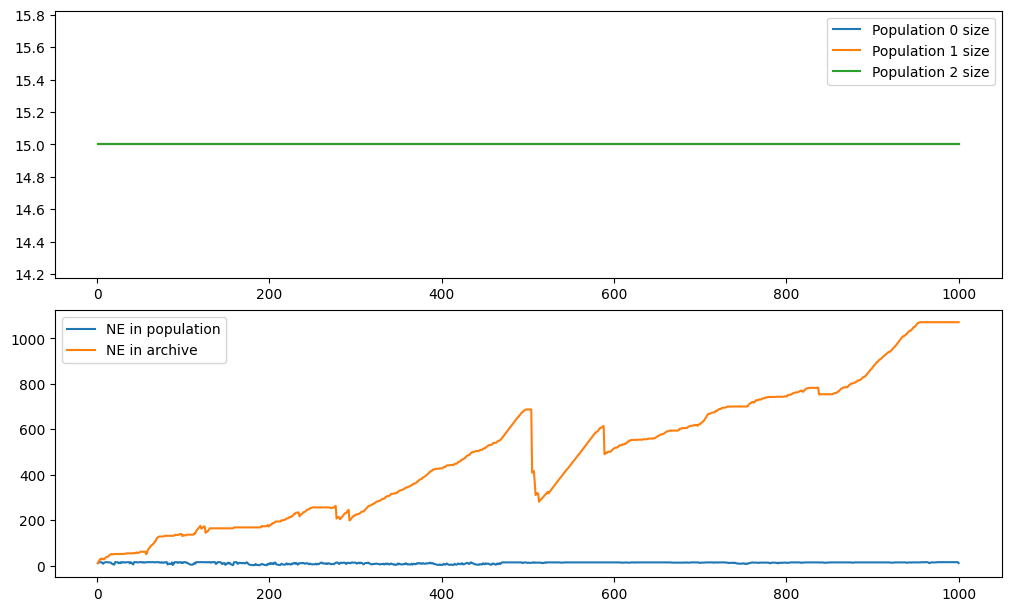

In [74]:
%matplotlib inline

plot_overview(history_3)

/tmp/ipykernel_27730/1655016950.py:47: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - p(φ)*(1 - α_D/(2*α_A)) - k_D*α_D if α_D < α_A else 1 - p(φ)*α_A/(2*α_D) - k_D*α_D
/tmp/ipykernel_27730/1655016950.py:49: RuntimeWarning: invalid value encountered in scalar divide
  return     p(φ)*(1 - α_D/(2*α_A)) - k_A*α_A if α_D < α_A else     p(φ)*α_A/(2*α_D) - k_A*α_A


SelectionSlider(description='Generation:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…

Output()

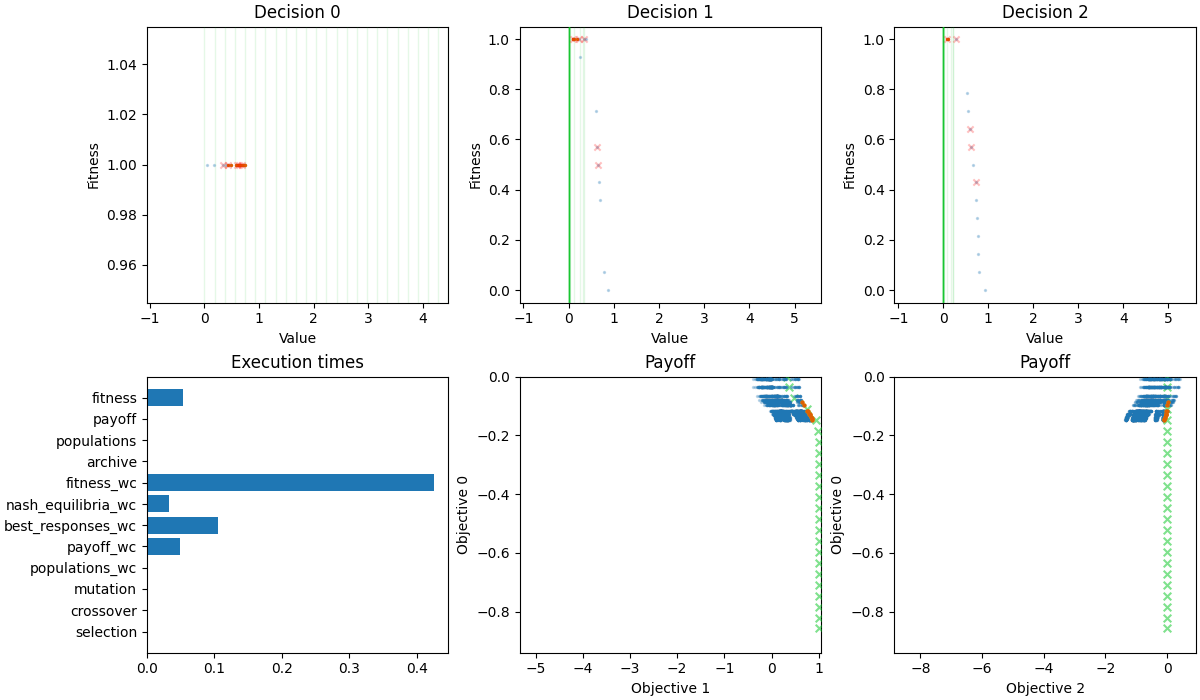

In [75]:
%matplotlib widget

plot_interactive_results(history_3, lambda min_individuals_global, max_individuals_global: list_analytical_ne(np.linspace(max(0, min_individuals_global[0]), max_individuals_global[0], 25)))

### Solving Example 7 by game simulation

In [77]:
import pickle
import time

k_D = 1.0
k_A = 1.5
c = 0.2 # 2.0
sims=50
max_dist = 0.1
p_mutation = 0.0 # 0.4
n_entities=10
n_children=5
n_generations=200
rw_base_value=0.1

def evaluate_simulation(solution):
    negative = [ n for d, n in enumerate(solution) if n < 0 ]
    if len(negative) > 0:
        return sum(negative)*1000000000*np.ones((3,))
    result = simulate(*solution, sims, k_D, k_A, c)
    return (-result['K'], result['si_β_D'], result['si_β_A'])

start = time.perf_counter()
history_4 = M4CoEA(
    evaluate_fn=evaluate_simulation,
    # crossover_fn=lambda parent_a, parent_b: crossover_fn(parent_a, parent_b, max_dist),
    crossover_fn=lambda parent_a, parent_b: parent_a + (np.random.rand()*2 - 1)*max_dist,
    mutate_fn=lambda child: child + (np.random.rand()*2 - 1)*max_dist,
    p_mutation=p_mutation,
    players_n_decisions=[ 2, 1 ],
    players_n_objectives=[ 2, 1 ],
    n_entities=n_entities,
    n_children=n_children,
    n_generations=n_generations,
    rw_base_value=rw_base_value,
    concurrent_evaluation=True,
)
finish = time.perf_counter()

with open('history_4_11.pickle', 'wb') as file:
    pickle.dump({
        'phi_zero': 5,
        'p': '1/2 - 1/2*np.tanh(phi_zero*(φ - 1/2))',
        'description': 'Simulated φ×α_D|α_A → β_D×K|β_A with crossover turned into mutation, penalty multiplier 1000000000, ζ deletion, leite_fitness3 and Tournament Selection',
        'history_4': history_4,
        'k_D': k_D,
        'k_A': k_A,
        'c': c,
        'max_dist': max_dist,
        'p_mutation': p_mutation,
        'n_entities': n_entities,
        'n_children': n_children,
        'n_generations': n_generations,
        'rw_base_value': rw_base_value,
        'sims': sims,
        'execution_time': finish - start,
    }, file)

# with open('history_4_11.pickle', 'rb') as file:
#     data = pickle.load(file)
#     print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
#     phi_zero = data['phi_zero']
#     history_4 = data['history_4']
#     k_D = data['k_D']
#     k_A = data['k_A']
#     c = data['c']
#     sims = data['sims']
#     max_dist = data['max_dist']
#     p_mutation = data['p_mutation']
#     n_entities = data['n_entities']
#     n_children = data['n_children']
#     n_generations = data['n_generations']
#     rw_base_value = data['rw_base_value'] if 'rw_base_value' in data else None

extract_M4CoEA_results(history_4)

generation      1  |  [0]:0.059...0.960  |  [1]:0.032...0.995  |  [2]:0.167...0.824
Nash Equilibrium (0.29914660804085, 0.18936941739962132, 0.22828369470027632) with outcomes [-0.05982932  0.30053178  0.16821822]
Nash Equilibrium (0.47031908309551995, 0.18936941739962132, 0.17736508017322705) with outcomes [-0.09406382  0.53840859  0.00654141]
Nash Equilibrium (0.5120455272151461, 0.18936941739962132, 0.16685442994726463) with outcomes [-0.10240911  0.60860576 -0.04770576]
Nash Equilibrium (0.82029303677496, 0.03191381342352462, 0.16685442994726463) with outcomes [-0.16405861  0.94044173 -0.22274173]
Nash Equilibrium (0.9599291045634378, 0.03191381342352462, 0.16685442994726463) with outcomes [-0.19198582  0.95473433 -0.23493433]
Nash Equilibrium (0.8540482752846104, 0.03191381342352462, 0.16685442994726463) with outcomes [-0.17080966  0.94614584 -0.22944584]
Nash Equilibrium (0.13642964038316951, 0.18936941739962132, 0.22828369470027632) with outcomes [-0.02728593  0.24624873  0.2223

[{'point': (1.0779884155837325, 0.012573361032763089, 0.06198656199513761),
  'value': array([-0.21559768,  0.9874    , -0.093     ])},
 {'point': (0.158710004690971, 0.2929864630855819, 0.2662213297446799),
  'value': array([-0.031742  ,  0.26513385,  0.04231615])},
 {'point': (0.8419064016973018, 0.012573361032763089, 0.06198656199513761),
  'value': array([-0.16838128,  0.95644207, -0.06144207])},
 {'point': (0.893229229386185, 0.012573361032763089, 0.06198656199513761),
  'value': array([-0.17864585,  0.97672433, -0.08207433])},
 {'point': (0.9806234835373059, 0.012573361032763089, 0.06198656199513761),
  'value': array([-0.1961247 ,  0.98417349, -0.08947349])},
 {'point': (1.0416222224572376, 0.012573361032763089, 0.06198656199513761),
  'value': array([-0.20832444,  0.98479063, -0.09099063])},
 {'point': (0.9416093874917593, 0.012573361032763089, 0.06198656199513761),
  'value': array([-0.18832188,  0.97714805, -0.08284805])}]

Plotting results:

<Figure size 1728x1008 with 0 Axes>

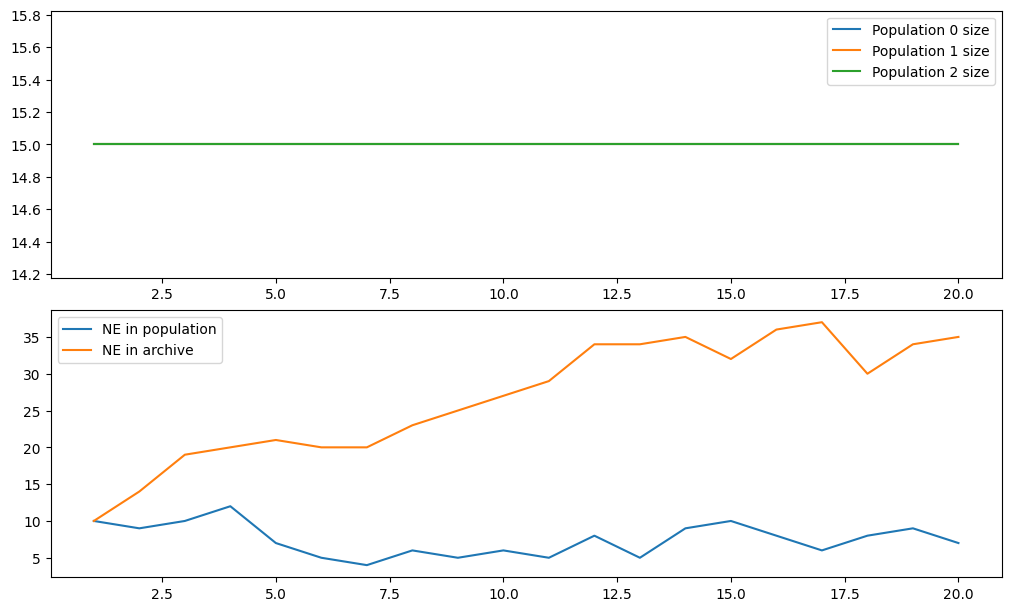

In [78]:
%matplotlib inline

plot_overview(history_4)

SelectionSlider(description='Generation:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…

Output()

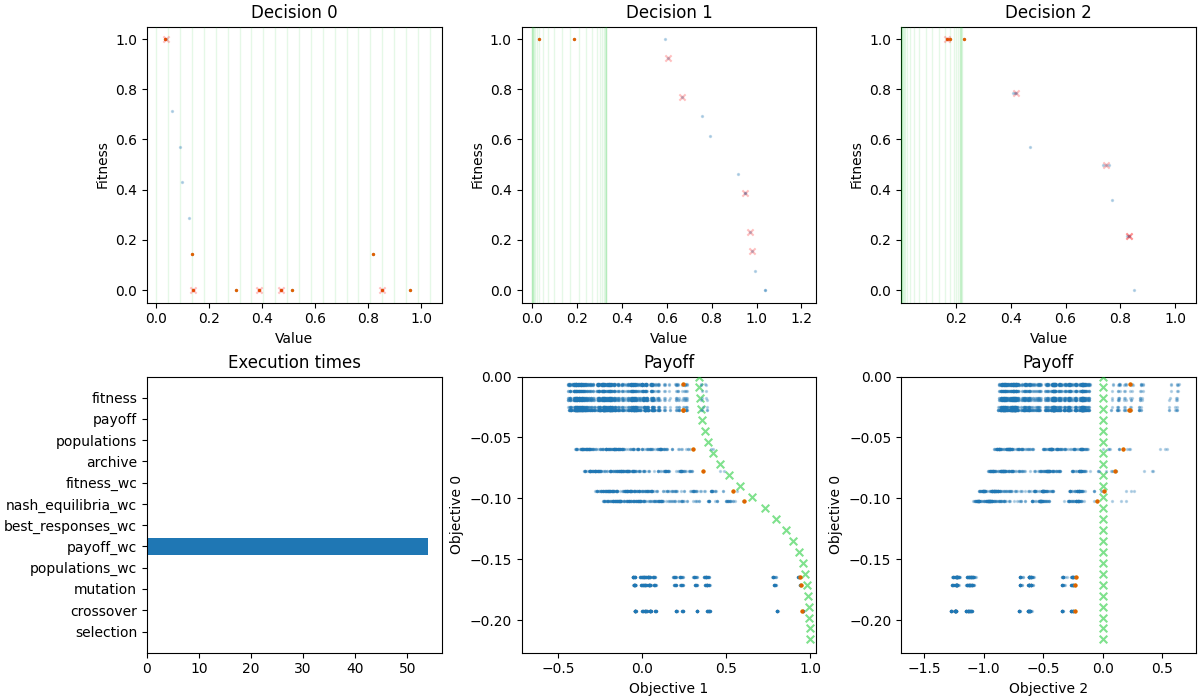

In [79]:
%matplotlib widget

plot_interactive_results(history_4, lambda min_individuals_global, max_individuals_global: list_analytical_ne(np.linspace(max(0, min_individuals_global[0]), max_individuals_global[0], 25)))

# Payoff interpolation attempts

## Manual gaussian (`interpolate_solution_gaussian`)

In [276]:
import numpy as np
from scipy.ndimage import gaussian_filter

def interpolate_solution_gaussian(array, indices):
    # Convert indices to integers (assuming array indices are integers)
    indices = np.floor(indices).astype(int)

    # Extract the subarray around the indices
    subarray = array[tuple(indices)]

    # Apply Gaussian smoothing to the subarray
    smoothed_subarray = gaussian_filter(subarray, sigma=1)

    return smoothed_subarray

# Example usage:
# Create a sample N-Dimensional Numpy array
array = np.array([
    [ [ 9,  5,  0], [10,  6,  0], [ 8,  1,  0], [ 4,  0,  0] ],
    [ [ 9, 10,  0], [ 9,  7,  0], [ 8,  2,  0], [10,  0,  0] ],
    [ [ 1,  3,  0], [ 3,  8,  0], [ 5,  1,  0], [12,  0,  0] ],
])

# Example indices for interpolation
interpolation_indices = np.array([
    0.00,
    0.00,
])  # Adjust indices as needed

# Call the function to get the interpolated payoff vector
interpolated_payoff = interpolate_solution_gaussian(array, interpolation_indices)

# print("Original Array:")
# print(array)
print("\nInterpolated Payoff Vector:")
print(interpolated_payoff)


Interpolated Payoff Vector:
[7 4 2]


## Manual non-gaussian (`interpolate_solution`)

Essentially yields the same results as my original `evaluate_fn`, except for the fact that it doesn't sanitize negative/overshot indices.

In [274]:
import numpy as np

def interpolate_solution(array, float_indices):
    # Convert float indices to integers
    lower_indices = np.floor(float_indices).astype(int)
    upper_indices = np.ceil(float_indices).astype(int)

    # Calculate fractional parts
    max_dist = np.linalg.norm(upper_indices - lower_indices)
    lower_payoff = array[tuple(lower_indices)]
    if max_dist == 0:
        return lower_payoff

    dist = np.linalg.norm(float_indices - lower_indices)
    α = dist / max_dist

    # Get neighboring payoff vectors
    upper_payoff = array[tuple(upper_indices)]

    # Interpolate between neighboring payoff vectors
    interpolated_payoff = (1 - α)*lower_payoff + α*upper_payoff

    return interpolated_payoff

# Example usage:
# Assume 'array' is your N-dimensional NumPy array
# array = np.random.rand(2, 3, 3, 2)  # Replace this with your actual array
array = payoff_6
# print(payoff_6)
solution = (0.0, -1.0, 2.1)
interpolated_result = interpolate_solution(array, solution)

print(f"Interpolated Payoff Vector: {interpolated_result}")
print(f"                       old: {evaluate_fn(solution)}")

Interpolated Payoff Vector: [1.1 0.  6.2]
                       old: [-1. -1. -1.]


## Plotting the original payoff matrix from Example 6

(3, 4, 10, 3) [10  0  4] [ 2  0 10] [ 1 10  1] [ 1  0 10]


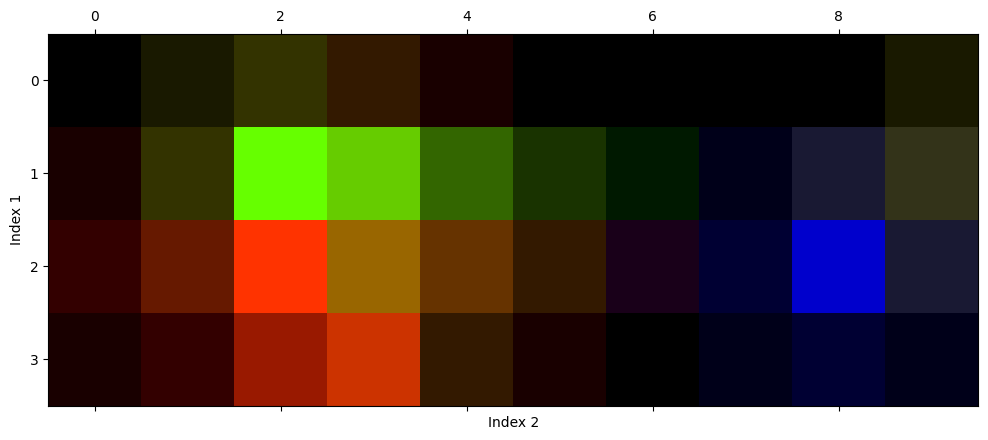

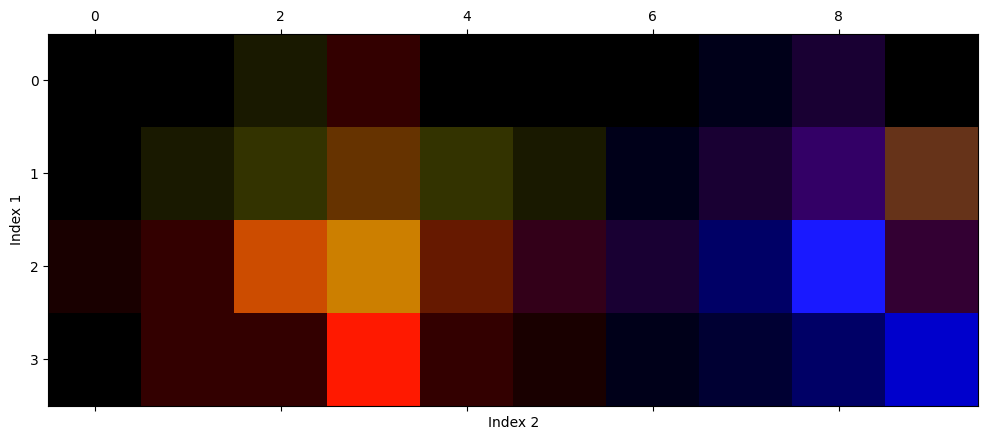

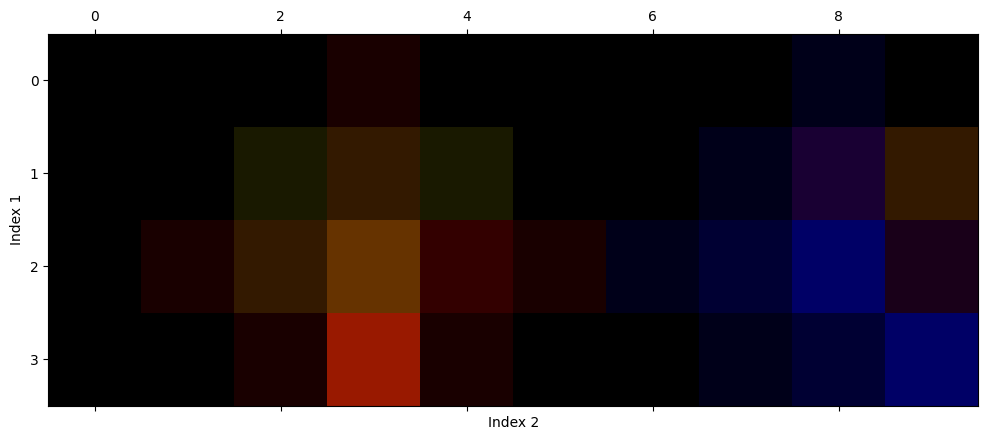

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def normalize_objectives(array):
    array_copy = np.array(array, dtype=float)
    min_0 = array_copy[..., 0].min()
    array_copy[..., 0] = (array_copy[..., 0] - min_0) / (array_copy[..., 0].max() - min_0)
    min_1 = array_copy[..., 1].min()
    array_copy[..., 1] = (array_copy[..., 1] - min_1) / (array_copy[..., 1].max() - min_1)
    min_2 = array_copy[..., 2].min()
    array_copy[..., 2] = (array_copy[..., 2] - min_2) / (array_copy[..., 2].max() - min_2)
    
    # Makes 1st objective green, 2nd objective blue and 3rd objective red:
    array_copy = array_copy[..., [2, 0, 1]]
    return array_copy

def plot_payoff(array):
    plt.matshow(array, origin='upper')
    plt.xlabel('Index 2')
    plt.ylabel('Index 1')
    plt.show()

print(payoff_6.shape, payoff_6[0, 1, 2], payoff_6[0, 2, 2], payoff_6[1, 2, 8], payoff_6[1, 3, 3])
array = normalize_objectives(payoff_6)
plot_payoff(array[0])
plot_payoff(array[1])
plot_payoff(array[2])

## Plotting the interpolated matrix from Example 6

In [30]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import ipywidgets as widgets
from ipywidgets import interactive_output
from IPython.display import display
from scipy.interpolate import interpn

# Update function for the slider
def generate_plot(slider_value):
    # plt.close('all')
    # plt.close()
    # plt.figure(figsize=(8, 4))
    plot_payoff(array[slider_value])


def interpolate_payoff(payoff, mult):
    points = tuple(np.arange(l) for l in payoff.shape[:-1])
    return np.array(u.create_multidimensional_list(
        [mult*l - (mult-1) for l in payoff.shape[:-1] ],
        # lambda indices: interpn(points, payoff, [ i/mult for i in indices ])[0],
        lambda indices: payoff_interpolation_evaluator(payoff, points, [ i/mult for i in indices ]),
        # lambda indices: interpolate_solution(payoff, [ i/mult for i in indices ]),
        # lambda indices: interpolate_solution_gaussian(payoff, [ i/mult for i in indices ]),
    ))

array = interpolate_payoff(payoff_6, 10)
array = normalize_objectives(array)

initial_slider_value = 0
initial_axes_values = (0, 0)

# Add slider
slider = widgets.SelectionSlider(
    options=range(array.shape[0]),
    value=initial_slider_value,
    description='Decision 0:',
)
out = interactive_output(generate_plot, {'slider_value': slider})
display(slider, out)


SelectionSlider(description='Decision 0:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …

Output()

In [17]:
print(interpn(tuple(np.arange(l) for l in payoff_6.shape[:-1]), payoff_6, [0.0, 1.0, 2.0])[0])
print(array.shape)

[10.  0.  4.]
(21, 31, 91, 3)


## Plotting the original payoff matrix from Example 7

In [26]:
# %matplotlib inline
# print(payoff_7.shape)
# array = normalize_objectives(payoff_7)
# plot_payoff(array[0])
# plot_payoff((array[payoff_7.shape[0] - 1]) * 1/4)
# plot_payoff((array[payoff_7.shape[0] - 1]) * 2/4)
# plot_payoff((array[payoff_7.shape[0] - 1]) * 3/4)
# plot_payoff(array[payoff_7.shape[0] - 1])

%matplotlib widget
array = normalize_objectives(payoff_7)

initial_slider_value = 0
initial_axes_values = (0, 0)

# Add slider
slider = widgets.SelectionSlider(
    options=range(array.shape[0]),
    value=initial_slider_value,
    description='Investment:',
)
out = interactive_output(generate_plot, {'slider_value': slider})
display(slider, out)


SelectionSlider(description='Investment:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …

Output()

# Fitness criterion evaluation

In [40]:
cross_α_A(φ=0)

0.2207349220168256

## Example 6

Distance to closest Nash Equilibrium:

In [132]:
def distance_to_closest_ne_6(decision_value, decision_index):
    if decision_index == 0:     # NE at 0 and 1
        return min(abs(decision_value - 0), abs(decision_value - 1))
    if decision_index == 1:     # NE at 1
        return abs(decision_value - 1)
    if decision_index == 2:     # NE at [2..3] and 9
        if decision_value < 2:
            return 2 - decision_value
        if 2 <= decision_value <= 3:
            return 0
        return min(abs(decision_value - 3), abs(decision_value - 9))

Correlation for d=0: -0.5706406124508584
Correlation for d=1: -0.023270717826883794
Correlation for d=2: -0.04990707466649162


<Figure size 640x480 with 0 Axes>

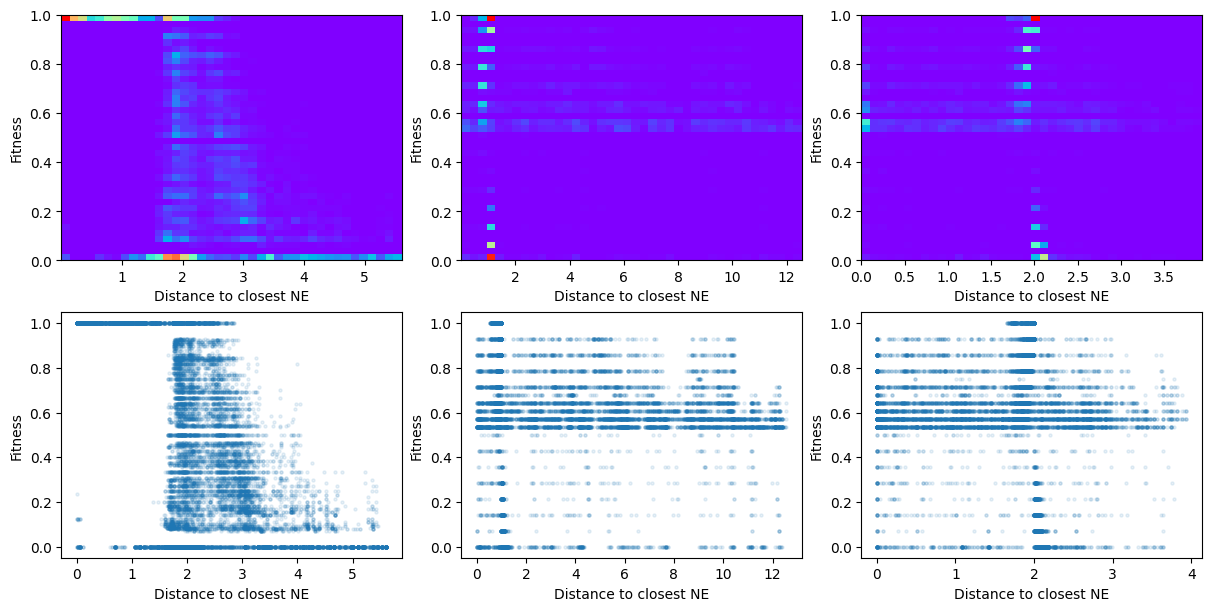

In [147]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_fitness_vs_closest_ne(history, distance):
    distances = [ [], [], [] ]
    fitnesses = [ [], [], [] ]
    for o in history:
        for d in range(3):
            for i, e in enumerate(o['populations_wc'][d]):
                distances[d].append(distance(e, d))
                fitnesses[d].append(o['fitness_wc'][d][i])
    distances = [ np.array(arr) for arr in distances ]
    fitnesses = [ np.array(arr) for arr in fitnesses ]
    
    plt.clf()
    fig = plt.figure(layout="constrained", figsize=(12, 6))
    gs2 = GridSpec(2, 3, figure=fig)

    num_bins = 40
    for d in range(3):
        ax_upper = fig.add_subplot(gs2[0, d])
        H, xedges, yedges = np.histogram2d(distances[d], fitnesses[d], bins=num_bins) #, density=True)
        H = H.T
        X, Y = np.meshgrid(xedges, yedges)
        ax_upper.pcolormesh(X, Y, H, cmap='rainbow')
        # ax_upper.pcolormesh(xedges, yedges, H, cmap='rainbow')
        ax_upper.set_xlabel('Distance to closest NE')
        ax_upper.set_ylabel('Fitness')

        ax_lower = fig.add_subplot(gs2[1, d])
        ax_lower.scatter(distances[d], fitnesses[d], label=f'Population {d}', s=5, alpha=0.1)
        ax_lower.set_xlabel('Distance to closest NE')
        ax_lower.set_ylabel('Fitness')
        # ax_lower.legend()

        print(f'Correlation for d={d}: {np.corrcoef(distances[d], fitnesses[d])[0, 1]}')

    plt.show()

plot_fitness_vs_closest_ne(history_3[1:], distance_to_closest_ne_6)
# plot_fitness_vs_closest_ne(history_3[1:101], distance_to_closest_ne_6)
# plot_fitness_vs_closest_ne(history_2[901:], distance_to_closest_ne_6)

## Example 7

Distance to closest Nash Equilibrium:

In [97]:
def distance_to_closest_ne_7(decision_value, decision_index):
    if decision_index == 0:
        if decision_value <= 0:
            return -decision_value
        return 0
    if decision_index == 1:
        if decision_value <= 0:
            return -decision_value
        limit_r = root_c(φ=0)
        if decision_value >= limit_r:
            return decision_value - limit_r
        return 0
    if decision_index == 2:
        if decision_value <= 0:
            return -decision_value
        limit_r = cross_α_A(φ=0)
        if decision_value >= limit_r:
            return decision_value - limit_r
        return 0

Correlation for d=0: -0.054699220106079006
Correlation for d=1: -0.02029638720498743
Correlation for d=2: -0.030552287546056045


<Figure size 640x480 with 0 Axes>

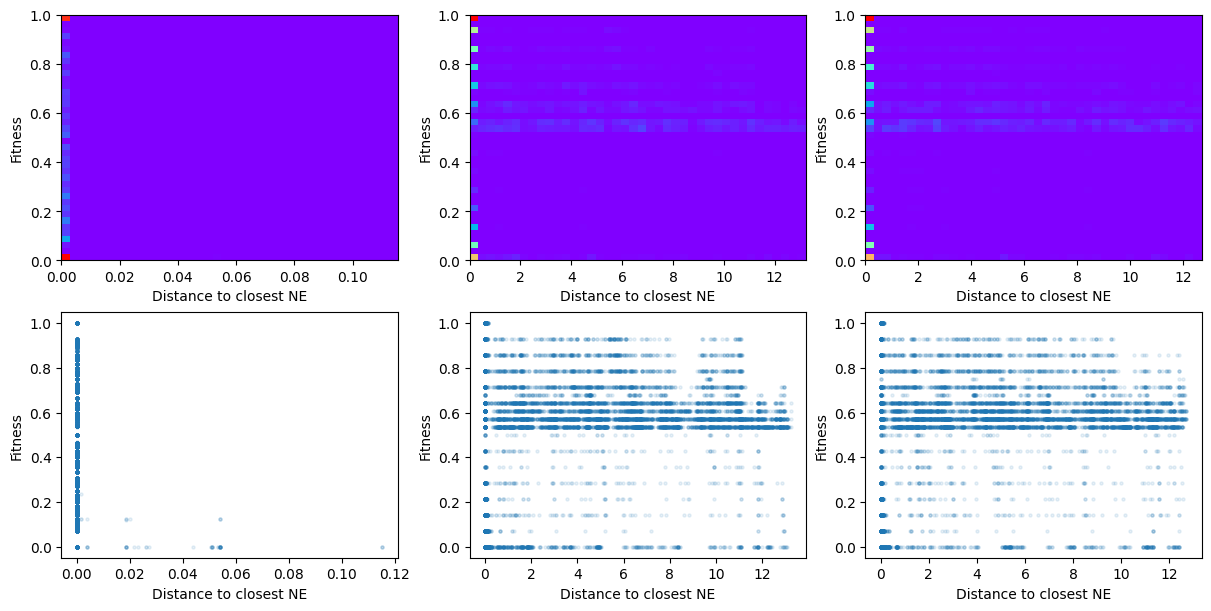

In [161]:
%matplotlib inline

plot_fitness_vs_closest_ne(history_3[1:], distance_to_closest_ne_7)
# plot_fitness_vs_closest_ne(history_3[1:101], distance_to_closest_ne_7)
# plot_fitness_vs_closest_ne(history_3[901:], distance_to_closest_ne_7)

# Archive filtering

## Example 6 (interpolated)

In [99]:
import copy

def redo_archive(history, players_objectives, domination_function):
    archive = []
    for g in history[1:]:
        NE_ = g['nash_equilibria_wc']
        O_ = g['payoff_wc']
        S_ = g['populations_wc']
        for o in list_nes(NE_, O_, S_):
            if len(archive) < 1000000:
                domination_function(archive, {
                    'point': o['point'],
                    'value': o['value'],
                }, players_objectives)
        g['archive'] = archive[:]

def spot_differences(history_old, history_new):
    gens = []
    for g in range(1, len(history_2_v2)):
        a_old = np.array([ list(o['point']) + list(o['value']) for o in history_old[g]['archive'] ])
        a_new = np.array([ list(o['point']) + list(o['value']) for o in history_new[g]['archive'] ])
        if np.any(a_old != a_new):
            gens.append(g)
    return gens

def test_fix(history_old, history_new, players_objectives, domination_function, v):
    redo_archive(history_new, players_objectives, domination_function)
    differences = spot_differences(history_old, history_new)
    if len(differences) > 0:
        print(f'---\nv{v}: differences spotted in {len(differences)} generations')
        # print(history_new[1]['archive'])
        # print(history_new[100]['archive'])
        # print(history_new[-1]['archive'])
        extract_M4CoEA_results(history_new)

with open('history_2_05.pickle', 'rb') as file:
    data = pickle.load(file)
    print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
    history_2_v2 = data['history_2']
    history_2_v3 = copy.deepcopy(data['history_2'])
    history_2_v4 = copy.deepcopy(data['history_2'])

# print(history_2[1]['archive'])
# print(history_2[100]['archive'])
# print(history_2[-1]['archive'])
extract_M4CoEA_results(history_2_v2)

test_fix(history_2, history_2_v2, [ [0, 1], [2] ], ledo.non_leite_dominated_insert2, 2)
test_fix(history_2, history_2_v3, [ [0, 1], [2] ], ledo.non_leite_dominated_insert3, 3)
test_fix(history_2, history_2_v4, [ [0, 1], [2] ], ledo.non_leite_dominated_insert4, 4)

Interpolated Example 6 with leite_fitness3 loaded. Original execution time: 643.7608833980012s
46 NE in archive    (46 unique, 0 shared) @ gen. 1000
1 NE in population (1 unique, 0 shared) @ gen. 1000
---
v2: differences spotted in 466 generations
46 NE in archive    (46 unique, 0 shared) @ gen. 1000
1 NE in population (1 unique, 0 shared) @ gen. 1000
---
v3: differences spotted in 466 generations
46 NE in archive    (46 unique, 0 shared) @ gen. 1000
1 NE in population (1 unique, 0 shared) @ gen. 1000
---
v4: differences spotted in 466 generations
46 NE in archive    (46 unique, 0 shared) @ gen. 1000
1 NE in population (1 unique, 0 shared) @ gen. 1000


In [114]:
def rank_archive(history, players_objectives):
    for g in range(1, len(history)):
        count = []
        for a in history[g]['archive']:
            count.append(len(players_objectives))
            # count.append(0)
            for player_objectives in players_objectives:
                o = [ v for i, v in enumerate(a['value']) if i in player_objectives ]
                for b in history[g]['archive']:
                    if a != b:
                        q = [ v for i, v in enumerate(b['value']) if i in player_objectives ]
                        if pado.pareto_dominates(q, o):
                            count[-1] -= 1
                        # if pado.pareto_dominates(o, q):
                        #     count[-1] += 1
                            break
        history[g]['archive_rank'] = count

rank_archive(history_4_v3, [ [0, 1], [2] ])

## Example 7 (algebraic)

In [86]:
import copy

with open('history_3_10.pickle', 'rb') as file:
    data = pickle.load(file)
    print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
    history_3_v2 = data['history_3']
    history_3_v3 = copy.deepcopy(data['history_3'])
    history_3_v4 = copy.deepcopy(data['history_3'])

# print(history_3[1]['archive'])
# print(history_3[100]['archive'])
# print(history_3[-1]['archive'])
extract_M4CoEA_results(history_3_v2)

test_fix(history_3, history_3_v2, ledo.non_leite_dominated_insert2, 2)
test_fix(history_3, history_3_v3, ledo.non_leite_dominated_insert3, 3)
test_fix(history_3, history_3_v4, ledo.non_leite_dominated_insert4, 4)

φ×α_D|α_A → β_D×K|β_A with crossover turned into mutation, penalty multiplier 1000000000, ζ deletion and leite_fitness3 loaded. Original execution time: 493.715633136977s
[{'point': (0.5616498103652748, 0.09792504088678966, 0.11766113253477495), 'value': array([-0.11232996,  0.69738337,  0.02819989])}, {'point': (0.5570945110144505, 0.09792504088678966, 0.11766113253477495), 'value': array([-0.1114189 ,  0.69128752,  0.03429574])}, {'point': (0.9292322800580461, 0.026789650633552764, 0.0852298821887818), 'value': array([-0.18584646,  0.96184155, -0.11647603])}, {'point': (0.7044353728286845, 0.026789650633552764, 0.0852298821887818), 'value': array([-0.14088707,  0.87660066, -0.03123514])}, {'point': (0.7087678680476849, 0.026789650633552764, 0.0852298821887818), 'value': array([-0.14175357,  0.88024508, -0.03487955])}, {'point': (0.5547557145496593, 0.09792504088678966, 0.11766113253477495), 'value': array([-0.11095114,  0.68812729,  0.03745597])}, {'point': (0.9860167945386945, 0.026

## Example 7 (simulated)

In [87]:
import copy

with open('history_4_09.pickle', 'rb') as file:
    data = pickle.load(file)
    print(f"{data['description']} loaded. Original execution time: {data['execution_time']}s")
    history_4_v2 = data['history_4']
    history_4_v3 = copy.deepcopy(data['history_4'])
    history_4_v4 = copy.deepcopy(data['history_4'])

# print(history_4[1]['archive'])
# print(history_4[100]['archive'])
# print(history_4[-1]['archive'])
extract_M4CoEA_results(history_4_v2)

test_fix(history_4, history_4_v2, ledo.non_leite_dominated_insert2, 2)
test_fix(history_4, history_4_v3, ledo.non_leite_dominated_insert3, 3)
test_fix(history_4, history_4_v4, ledo.non_leite_dominated_insert4, 4)

Simulated φ×α_D|α_A → β_D×K|β_A with crossover turned into mutation, penalty multiplier 1000000000, ζ deletion and leite_fitness3 loaded. Original execution time: 15415.652129285998s
168 NE in archive    (168 unique, 0 shared) @ gen. 1000
2 NE in population (2 unique, 0 shared) @ gen. 1000


/tmp/ipykernel_8023/3686881679.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.any(a_old != a_new):


---
v2: differences spotted in 998 generations
162 NE in archive    (162 unique, 0 shared) @ gen. 1000
2 NE in population (2 unique, 0 shared) @ gen. 1000
---
v3: differences spotted in 998 generations
164 NE in archive    (164 unique, 0 shared) @ gen. 1000
2 NE in population (2 unique, 0 shared) @ gen. 1000
---
v4: differences spotted in 998 generations
164 NE in archive    (164 unique, 0 shared) @ gen. 1000
2 NE in population (2 unique, 0 shared) @ gen. 1000


<Figure size 640x480 with 0 Axes>

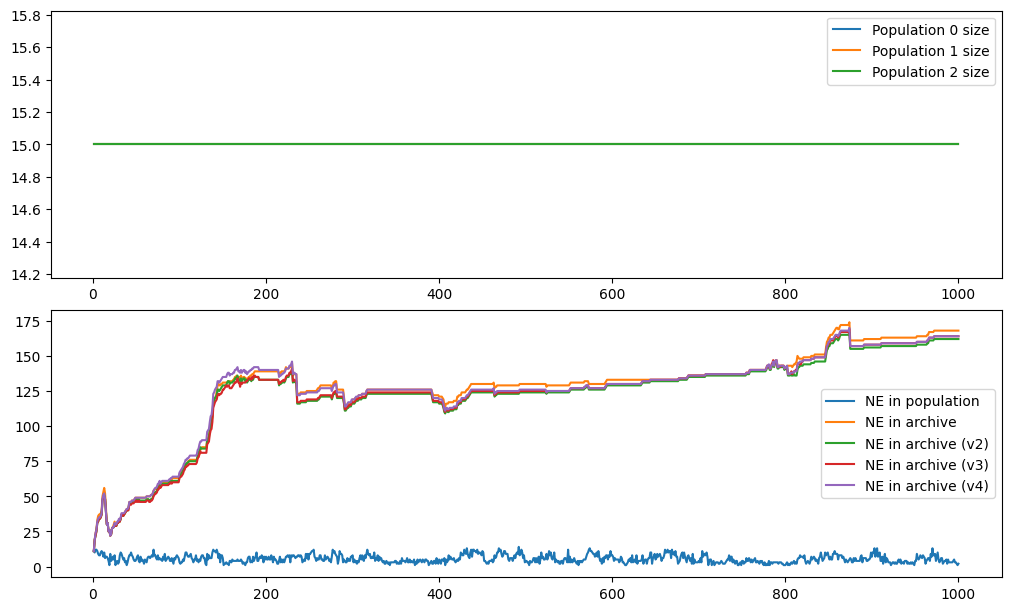

In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_overview_compare(history_old, history_new2, history_new3, history_new4):
    plt.clf()
    x = range(1, len(history_old))

    fig3 = plt.figure(layout="constrained", figsize=(10, 6))
    gs2 = GridSpec(2, 1, figure=fig3)
    ax_population_size = fig3.add_subplot(gs2[0, 0])
    y0 = [ len(history_old[gen]['populations_wc'][0]) for gen in x ]
    ax_population_size.plot(x, y0, label='Population 0 size')
    y1 = [ len(history_old[gen]['populations_wc'][1]) for gen in x ]
    ax_population_size.plot(x, y1, label='Population 1 size')
    y2 = [ len(history_old[gen]['populations_wc'][2]) for gen in x ]
    ax_population_size.plot(x, y2, label='Population 2 size')
    
    ax_population_size.legend()

    ax_after = fig3.add_subplot(gs2[1, 0], sharex=ax_population_size)
    pn = [ len(history_old[gen]['nash_equilibria_wc']) for gen in x ]
    ax_after.plot(x, pn, label='NE in population')
    an = [ len(history_old[gen]['archive']) for gen in x ]
    ax_after.plot(x, an, label='NE in archive')
    an = [ len(history_new2[gen]['archive']) for gen in x ]
    ax_after.plot(x, an, label='NE in archive (v2)')
    an = [ len(history_new3[gen]['archive']) for gen in x ]
    ax_after.plot(x, an, label='NE in archive (v3)')
    an = [ len(history_new4[gen]['archive']) for gen in x ]
    ax_after.plot(x, an, label='NE in archive (v4)')
    ax_after.legend()

    plt.show()

plot_overview_compare(history_4, history_4_v2, history_4_v3, history_4_v4)

/tmp/ipykernel_8023/1655016950.py:47: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - p(φ)*(1 - α_D/(2*α_A)) - k_D*α_D if α_D < α_A else 1 - p(φ)*α_A/(2*α_D) - k_D*α_D
/tmp/ipykernel_8023/1655016950.py:49: RuntimeWarning: invalid value encountered in scalar divide
  return     p(φ)*(1 - α_D/(2*α_A)) - k_A*α_A if α_D < α_A else     p(φ)*α_A/(2*α_D) - k_A*α_A


SelectionSlider(description='Generation:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…

Output()

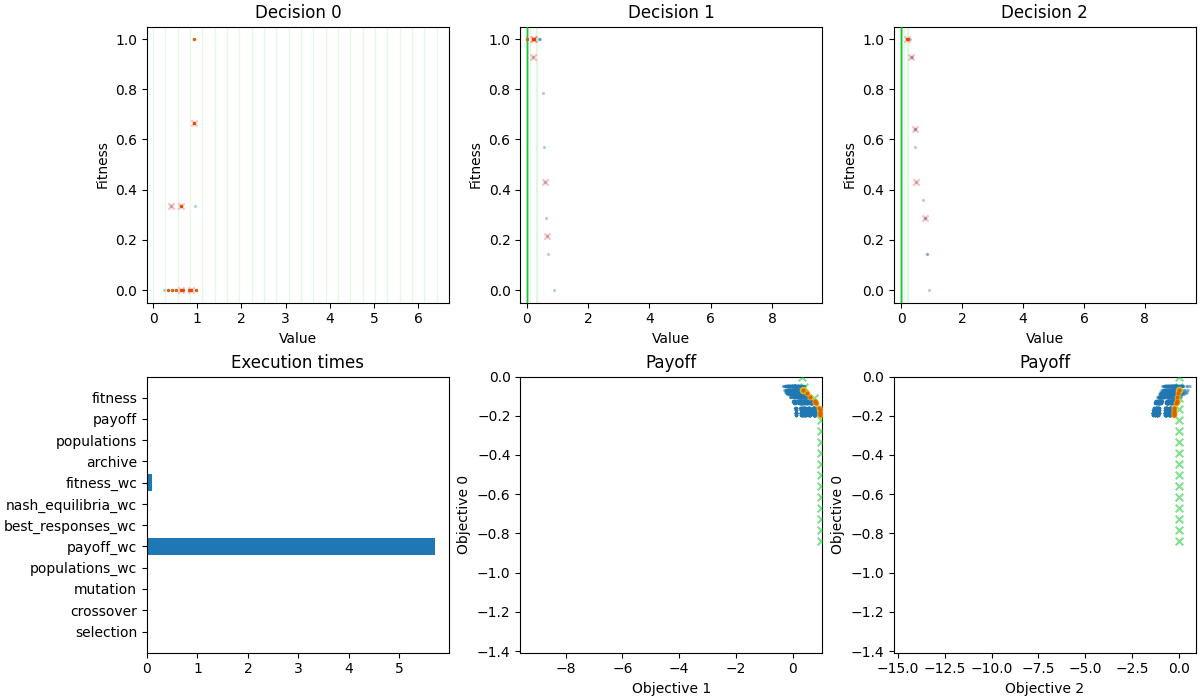

In [ ]:
%matplotlib widget

plot_interactive_results(history_4_v3, lambda min_individuals_global, max_individuals_global: list_analytical_ne(np.linspace(max(0, min_individuals_global[0]), max_individuals_global[0], 25)))